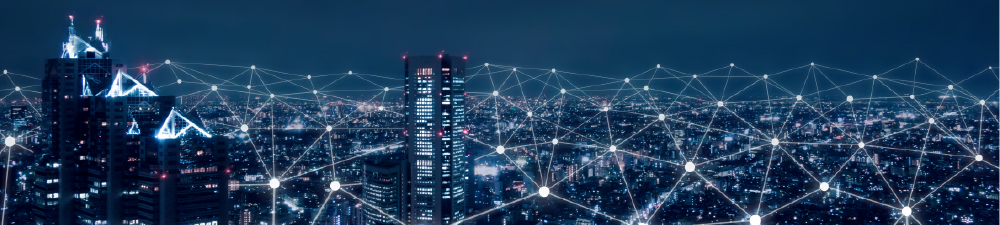

# Mini Project 3  - IU 4.6 Machine Learning

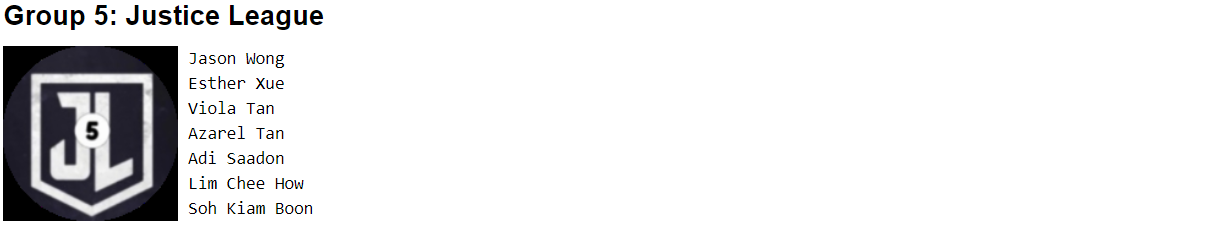

<h2>Table of Contents</h2>
<h3>Customer Churn Analysis with Machine Learning</h3>


Q1. [Detect and resolve problems in the data (Missing value, Outliers, etc.)](#Q1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1 [How many customers had zero monthly revenue?](#1.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2 [How many columns has missing values percentage > 5%](#1.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.3 [For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any](#1.3)<br>
<br>
Q2. [Perform exploratory analysis to analyze customer churn](#Q2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 [Does customers with high overage minutes also have high revenue?](#2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 [Does high number of active subscribers lead to low monthly revenue?](#2.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3 [Does credit rating have an impact in churn rate?](#2.3)<br>
<br>
Q3. [Create additional features to help predict churn](#Q3)<br>
<br>
Q4. [Use the hold out data provided to predict churners using the best model identified in step 4](#Q4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1 [Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set](#4.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2 [Build Random Forest classifier to compare model accuracy over the logistic regression model](#4.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3 [Identify most important features impacting churn](#4.3)<br>
<br>
Q5. [Use the hold out data provided to predict churners using the best model identified in step 4 ](#Q5)<br>
<br>
Q6. [[Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model)](#Q6)<br>

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import os
from scipy.stats import shapiro
import scipy.stats as stats

# For Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, roc_auc_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = "ignore", category = FutureWarning)

## Reading data and initial processing

In [2]:
# Edit the file location of raw data set
cust_df = pd.read_csv("Mini_project_3_Data.csv")
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


---

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better
# Check how many rows and columns
print(f"There are {cust_df.shape[0]} rows and {cust_df.shape[1]} columns. \n")

# Check any dulicated rows
print(f"There is {cust_df[cust_df.duplicated()].count().sum()} duplicated value. \n")

# Check total number of missing values
print(f"Total number of missing values: {cust_df.isna().values.sum()} \n")

# Check total rows of missing values
print(f"Total rows contain missing values: {len(cust_df[cust_df.isna().any(axis = 1)]) } \n")

# View some basic statistical details
cust_df.drop("CustomerID", axis = 1).describe()  # Remove CustomerID before performing .describe()

# View concise summary of the cust_df DataFrame
cust_df.info()

There are 51047 rows and 58 columns. 

There is 0 duplicated value. 

Total number of missing values: 3515 

Total rows contain missing values: 1295 



,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
# Show only columns that have missing values instead of showing all columns without missing values
for x in cust_df.columns:
    missing_val = []

    if cust_df[x].isna().sum() != 0:                           # Show the columns are not zero
        print(f"{x: >21}", f"{cust_df[x].isna().sum(): > 7}")  # Adjusting result alignment
        missing_val.append(x)

       MonthlyRevenue     156
       MonthlyMinutes     156
 TotalRecurringCharge     156
DirectorAssistedCalls     156
       OverageMinutes     156
         RoamingCalls     156
    PercChangeMinutes     367
   PercChangeRevenues     367
          ServiceArea      24
             Handsets       1
        HandsetModels       1
 CurrentEquipmentDays       1
               AgeHH1     909
               AgeHH2     909


In [5]:
# Re-validate column data types, groupby data types in Dictionary:
data_type_dict = cust_df.columns.to_series().groupby(cust_df.dtypes).groups

# Displaying Key-Value pairs
[print(k, v, "\n") for k, v in enumerate(data_type_dict.items())]

0 (dtype('int64'), Index(['CustomerID', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')) 

1 (dtype('float64'), Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2'],
      dtype='object')) 

2 (dtype('O'), Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'Buys

[None, None, None]

<a id='Q1'><h2>Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)</h2></a>

<a id="1.1"><h3>1.1 How many customers had zero monthly revenue?</h3></a>

In [6]:
# How many customers had zero monthly revenue?
# Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

# Zero Revenue
zero_cust = cust_df[(cust_df["MonthlyRevenue"] == 0)]
display(zero_cust)

f"There are {zero_cust.shape[0]} customers with zero monthly revenue."  # Use shape to get the number of rows

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No


'There are 6 customers with zero monthly revenue.'

In [7]:
# Negative Revenue
neg_cust = cust_df[cust_df["MonthlyRevenue"] < 0]
display(neg_cust)

f"There are also {neg_cust.shape[0]} customers with negative monthly revenue."

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
26596,3210322,No,-2.52,211.0,0.0,0.33,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,3-Good,Suburban,Other,Unknown
33352,3265738,No,-5.86,0.0,-5.0,0.00,0.0,0.0,0.0,5.9,...,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Yes
48038,3378298,No,-6.17,0.0,-6.0,0.00,0.0,0.0,0.0,6.2,...,0,6,No,0,Unknown,No,7-Lowest,Suburban,Other,No


'There are also 3 customers with negative monthly revenue.'

In [8]:
cust_df = cust_df[cust_df["MonthlyRevenue"] > 0]  # All negative & zero revenue being removed. Noticed that the NaNs /
cust_df.head()                                    # in this column will also excluded.

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [9]:
# Check columns
cust_df.shape

(50882, 58)

<a id="1.2"><h3>1.2 How many columns has missing values percentage > 5%</h3></a>

In [10]:
# Calculate for each column % of missing value in the data
# How many columns has missing values percentage > 5%
# What strategy should be used for imputation?

missing_pctg = pd.DataFrame(cust_df.isna().sum() / len(cust_df), columns = ["Missing %"])  # Convert to DataFrame
missing_pctg.sort_values(by = "Missing %", ascending = False)                              # Sort & display all columns

,Missing %
AgeHH2,0.017786
AgeHH1,0.017786
PercChangeMinutes,0.004088
PercChangeRevenues,0.004088
ServiceArea,0.000472
HandsetModels,0.000020
Handsets,0.000020
CurrentEquipmentDays,0.000020
AdjustmentsToCreditRating,0.000000
HandsetPrice,0.000000


In [11]:
missing_pctg[missing_pctg["Missing %"] > 0.05]  # Filtering those columns more than 5% - It's zero!

,Missing %


`It's empty, there's no column with more than 5% of missing vaues`

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
* We can use some solutions/methods for the missing values:

 * #### **1. A Simple Option (Not Recommended) - Drop Columns with Missing Values:-**
     * Remove rows with missing values
<br><br>
 * #### **2. A Better Option - Imputation:-**
   * i. <u>For NaN in Numeric Columns</u>:
     * If we had any missing values in the numeric columns of the dataset, then we can find the average of each one of those columns and fill their missing values by either using **for loop** + **fillna()** method with mean value.<br>

   * ii. <u>For NaN in Object Columns</u>:
     * We could find the mode of the most popular value by using **df["ColName"].value_counts()** or **df["ColName"].mode()** then impute with either **.fillna()** or .**replace()** functions for category data types.
<br><br>
 * #### **3. An extension to the imputation:-**
   * Use **from sklearn.impute import SimpleImputer** and fit_transform those NaN columns with strategy = "mean" value.

<a id="1.3"><h3>1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any</h3></a>

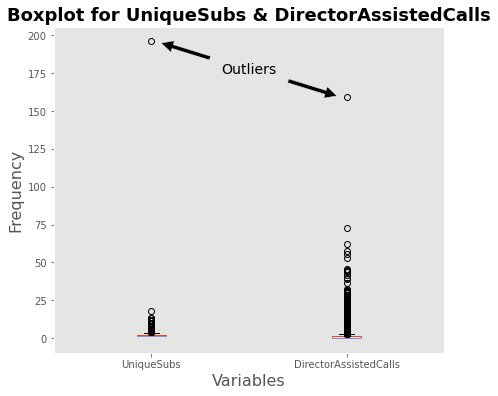

In [12]:
# Plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols = ["UniqueSubs", "DirectorAssistedCalls"]

plt.figure(figsize = (7, 6))
cust_df.boxplot(column = cols)
plt.grid(False)
plt.xlabel("Variables", size = 16)
plt.ylabel("Frequency", size = 16)
plt.title("Boxplot for UniqueSubs & DirectorAssistedCalls", size = 18, fontweight = "bold")

# Annotation
plt.annotate("", xy = (1.05, 195), xytext = (1.3, 185), arrowprops = dict(fc = "k"))
plt.annotate("", xy = (1.95, 160), xytext = (1.7, 170), arrowprops = dict(fc = "k"))
plt.annotate("Outliers", xy = (1.5, 175), xytext = (1.5, 175),  ha = "center", size = 14);

In [13]:
# Identify Top 1% of outliers by quantile
top_99 = cust_df[(cust_df["UniqueSubs"] > cust_df["UniqueSubs"].quantile(0.99)) | 
                 (cust_df["DirectorAssistedCalls"] > cust_df["DirectorAssistedCalls"].quantile(0.99))]
top_99

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
61,3000406,No,114.13,1650.0,83.0,1.73,52.0,0.0,-177.0,17.9,...,0,4,No,0,130,No,1-Highest,Other,Clerical,No
83,3000570,No,260.81,3210.0,213.0,44.30,0.0,0.0,-422.0,-21.2,...,0,5,No,3,150,No,3-Good,Other,Other,Unknown
87,3000598,No,122.00,1806.0,75.0,15.59,146.0,1.0,-156.0,-32.8,...,0,0,No,0,30,No,6-VeryLow,Suburban,Other,Unknown
104,3000730,Yes,117.12,490.0,70.0,0.00,140.0,0.0,506.0,133.8,...,0,2,No,0,30,Yes,6-VeryLow,Suburban,Other,Unknown
107,3000762,Yes,180.22,3559.0,150.0,11.38,99.0,0.0,-149.0,-11.4,...,0,0,No,0,150,No,3-Good,Other,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50754,3397714,No,121.05,1225.0,110.0,13.53,0.0,6.9,419.0,3.8,...,0,0,No,0,200,No,7-Lowest,Other,Other,Unknown
50803,3398054,No,315.63,1920.0,100.0,13.86,785.0,0.3,-133.0,-35.9,...,0,9,No,0,30,No,1-Highest,Other,Other,No
50817,3398162,No,232.66,3360.0,160.0,10.39,506.0,0.0,1578.0,199.8,...,0,3,No,0,200,No,5-Low,Suburban,Clerical,No
50862,3398526,Yes,108.20,486.0,30.0,11.88,190.0,0.0,410.0,78.2,...,0,5,No,0,Unknown,No,5-Low,Other,Professional,No


In [14]:
# Remaining 99% by quantile (Total rows = 50882, 1% = 178 rows, 99% - 50164 rows)
df_99 = cust_df[(cust_df["UniqueSubs"] <= cust_df["UniqueSubs"].quantile(0.99)) &
                (cust_df["DirectorAssistedCalls"] <= cust_df["DirectorAssistedCalls"].quantile(0.99))]
df_99

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


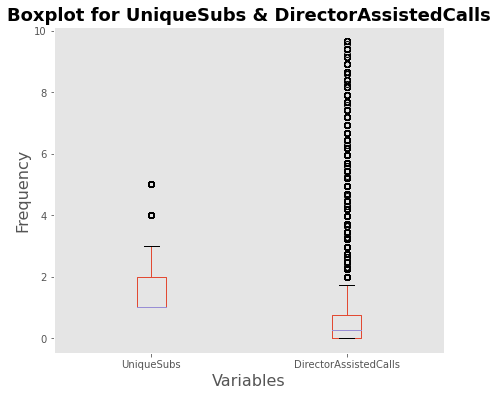

In [15]:
# Visualization of boxplot
df_99[["UniqueSubs", "DirectorAssistedCalls"]].plot(kind = "box", figsize = (7, 6))
plt.grid(False)
plt.xlabel("Variables", size = 16)
plt.ylabel("Frequency", size = 16)
plt.title("Boxplot for UniqueSubs & DirectorAssistedCalls", size = 18, fontweight = "bold");

In [16]:
# Check the rows after removing outliers
df_99.shape

(50164, 58)

In [17]:
# Checkpoint - Make a copy
cust_df = df_99.copy()

## Handling of Missing Values
* For the rest of the NaN values, We will impute the mean values for the numeric columns; and mode for the object type columns for each particular columns.

In [18]:
# Check missing values in clean_df again

for x in cust_df.columns:
    missing_val = []

    if cust_df[x].isna().sum() != 0:                           # Show the columns that are not zero.
        print(f"{x: >21}", f"{cust_df[x].isna().sum(): > 7}")  # Adjusting result alignment
        missing_val.append(x)

    PercChangeMinutes     208
   PercChangeRevenues     208
          ServiceArea      23
             Handsets       1
        HandsetModels       1
 CurrentEquipmentDays       1
               AgeHH1     870
               AgeHH2     870


In [19]:
# If we had any missing values in the numeric columns of the dataset, then we should find the average of each /
# one of those columns and fill their missing values.
# We will go for the For Loop and find the mean value and fill missing values programmatically:

# Settings for na_cols:
na_cols = cust_df.isna().any()                   # Find any columns that contains NaNs
na_cols = na_cols[na_cols == True].reset_index() # Reset the index number, those columns will be under column name "index"
na_cols = na_cols["index"].tolist()              # Convert Series to list


# Imputing mean for all numerical columns only:
for col in cust_df.columns[1:]:                  # Skip the 0-th column, CustomerID no need
     if col in na_cols:
        if cust_df[col].dtype != "O":            # Except object
             cust_df[col] =  cust_df[col].fillna(cust_df[col].mean()).round(0)  # Fillna with mean value and then round /
                                                                                # them up to 0 decimal place.

In [20]:
# Check again any NaNs in the columns after imputed the mean value in clean_df.
# Now we left only ServiceArea because this column is an Object type.

for x in cust_df.columns:
    missing_val = []

    if cust_df[x].isna().sum() != 0:                      # Show the columns are not zero.
        print(f"{x}", f"{cust_df[x].isna().sum(): > 7}")  # Adjusting result alignment.
        missing_val.append(x)

ServiceArea      23


In [21]:
# Straight away impute NaN with most frequent value by using .mode() method.
cust_df["ServiceArea"].fillna(cust_df["ServiceArea"].mode()[0], inplace = True)  # .mode(0) will take the value of mode.

In [22]:
# Check the whole DataFrame whether there are still NaNs in it
cust_df.isna().sum().sum()  # OR.. clean_df.isna().values.any() to check boolean

0

In [23]:
# Make a copy
clean_df = cust_df

<a id='Q2'><h2>Q2. Perform exploratory analysis to analyze customer churn</h2></a>

<a id="2.1"><h3>2.1 Does customers with high overage minutes also have high revenue?</h3></a>

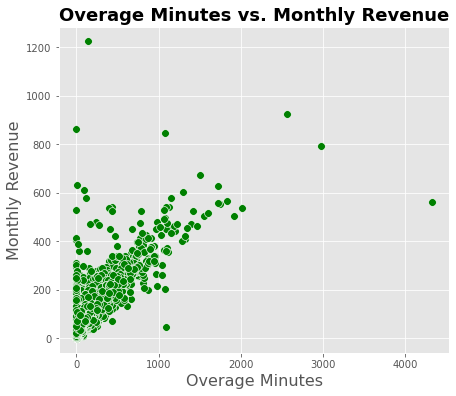

In [24]:
# Use scatter plot to find the correlation between monthly revenue and overage minutes
fig, ax = plt.subplots(figsize = (7, 6))
sns.scatterplot(x = "OverageMinutes", y = "MonthlyRevenue", data = clean_df, s = 60, color = "green")
ax.set_xlabel("Overage Minutes", size = 16)
ax.set_ylabel("Monthly Revenue", size = 16)
ax.set_title("Overage Minutes vs. Monthly Revenue", size = 18, fontweight = "bold");

In [25]:
# Correlation Coefficient between MonthlyRevenue & OverageMinutes
clean_df["MonthlyRevenue"].corr(clean_df["OverageMinutes"]).round(2)

0.78

<mark>__Result:__
    
`Yes, according to the scatterplot, customers with high overage minutes also have high revenue. There is a positive correlation between the overage minutes and monthly revenue, further supported by the correlation coefficient of 0.78.`

<a id="2.2"><h3>2.2 Does high number of active subscribers lead to low monthly revenue?</h3></a>

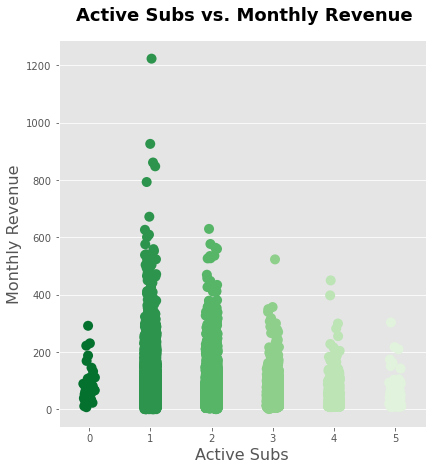

In [26]:
# Use category plot to plot monthly revenue for each active subs category
cp = sns.catplot(x = "ActiveSubs", y = "MonthlyRevenue", data = clean_df, palette = "Greens_r", s = 10, kind = "strip")
cp.fig.set_size_inches(6, 6)
cp.ax.set_xlabel("Active Subs", size = 16)
cp.ax.set_ylabel("Monthly Revenue", size = 16)
cp.fig.suptitle("Active Subs vs. Monthly Revenue", size = 18, fontweight = "bold", x = 0.55, y = 1.05);

In [27]:
# Correlation Coefficient between MonthlyRevenue & ActiveSubs
clean_df["MonthlyRevenue"].corr(clean_df["ActiveSubs"]).round(2)

-0.05

<mark>__Result:__
    
`Yes, according to the category plot, the inferred insight indicates high number of active subscribers lead to low monthly revenue. There is a negative correlation between total number of active subscriptions and monthly revenue, further supported by a correlation coefficient of -0.04.`

<a id="2.3"><h3>2.3 Does credit rating have an impact in churn rate?</h3></a>

In [28]:
# Clustering for proportion of churn within each clusters, we need to groupby for 2 groups and find thier size.
grp_a = clean_df.groupby(["Churn", "CreditRating"]).size()
grp_a

Churn  CreditRating
No     1-Highest        5740
       2-High          13174
       3-Good           5696
       4-Medium         3895
       5-Low            4948
       6-VeryLow         802
       7-Lowest         1480
Yes    1-Highest        2550
       2-High           5662
       3-Good           2563
       4-Medium         1370
       5-Low            1387
       6-VeryLow         296
       7-Lowest          601
dtype: int64

In [29]:
grp_b = clean_df.groupby("CreditRating").size()
grp_b

CreditRating
1-Highest     8290
2-High       18836
3-Good        8259
4-Medium      5265
5-Low         6335
6-VeryLow     1098
7-Lowest      2081
dtype: int64

In [30]:
# Determine the proportion of churn by credit rating
proportion = grp_a / grp_b

# Make it in transposed DF and unstack it 
pd.DataFrame(proportion, columns = ["Proportion"]).unstack().T  

Churn                          No       Yes
           CreditRating                    
Proportion 1-Highest     0.692400  0.307600
           2-High        0.699405  0.300595
           3-Good        0.689672  0.310328
           4-Medium      0.739791  0.260209
           5-Low         0.781058  0.218942
           6-VeryLow     0.730419  0.269581
           7-Lowest      0.711197  0.288803

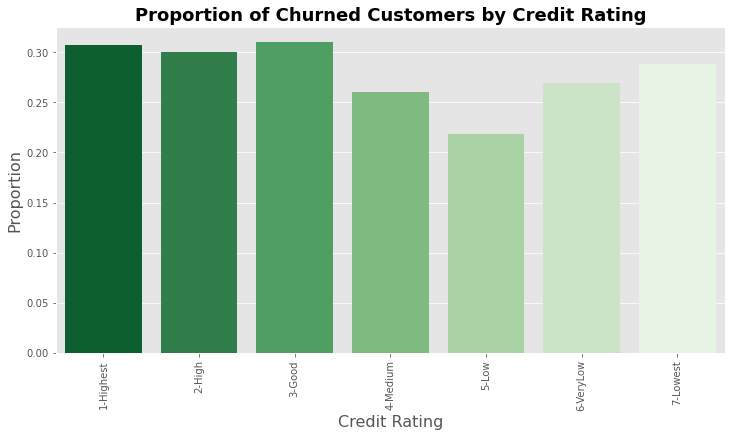

In [31]:
# And then we visualize it
proportion_yes = proportion["Yes"]  # We need only the "Churn - Yes", see whether they impact the credit rating
plt.figure(figsize = (12, 6))
sns.barplot(x = proportion_yes.index, y = proportion_yes.values, palette = ("Greens_r"))
plt.xticks(rotation = 90)
plt.title("Proportion of Churned Customers by Credit Rating", weight = "bold", fontsize = 18)
plt.xlabel("Credit Rating", fontsize = 16)
plt.ylabel("Proportion", fontsize = 16);

<mark>__Result:__ Type your interpretation here based on the analysis above

`Based on the above analyses, the credit ratings of the customers do not have any impact in churn rate.`

### Placeholder for additional exploratory analysis

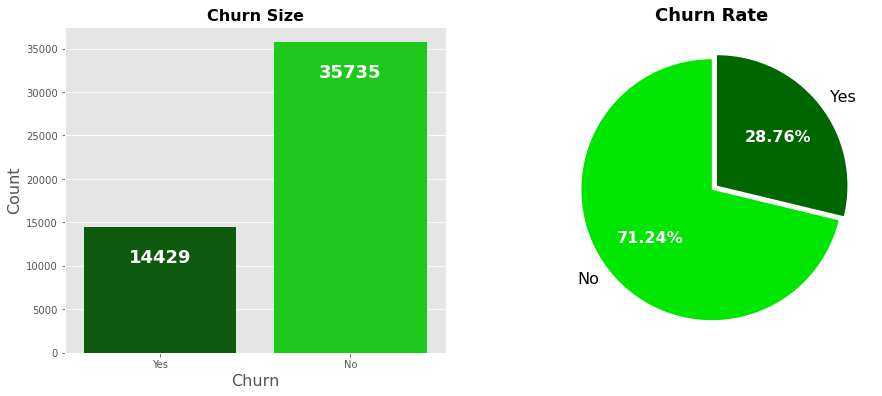

In [32]:
# Visualize the churners and non-churners
fig = plt.figure(figsize = (15, 6))
# sns.set(font_scale = 1)

# Churn Size
ax1 = plt.subplot(121)
sns.countplot(x = "Churn", data = cust_df, ax = ax1, palette = ["#006600", "#00e600"])
for p in ax1.patches:
    ax1.annotate(f"\n{p.get_height()}", (p.get_x()+0.4, p.get_height()),
                ha = "center", va = "top", color = "w", size = 18, weight = "bold")
ax1.set_title("Churn Size", size = 16, fontweight = "bold")
ax1.set_xlabel("Churn", fontsize = 16)
ax1.set_ylabel("Count", fontsize = 16)


# Churn Rate
ax2 = plt.subplot(122)
churn_rate = cust_df["Churn"].value_counts() / cust_df["Churn"].count() * 100
_, _, autotxt = ax2.pie(churn_rate, explode = [0, 0.05], labels = ("No", "Yes"), 
                        autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 16},
                        colors = ["#00e600", "#006600"])
plt.setp(autotxt, size = 16, weight = 800, color = "w")
ax2.set_title("Churn Rate", fontdict = {"fontsize": 18, "fontweight": 600});

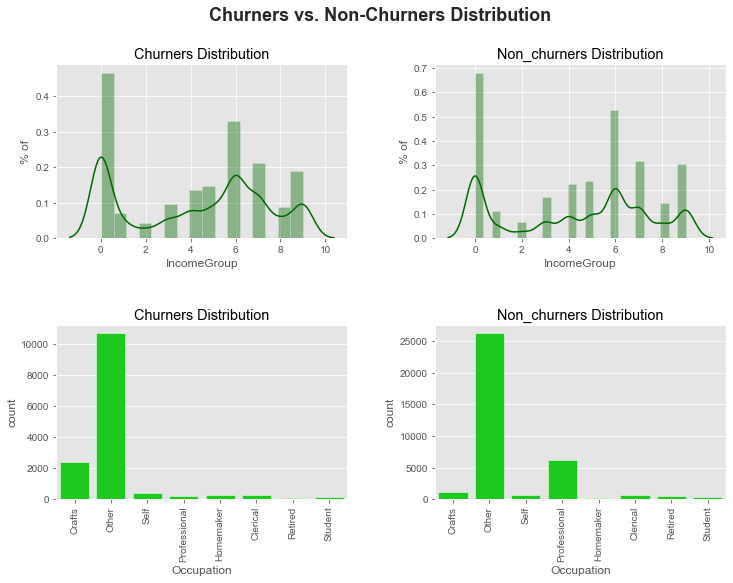

In [33]:
# Churners vs. Non-Churners Distribution
churners = clean_df.loc[lambda x: x["Churn"] == "Yes"]
Non_churners = clean_df[clean_df["Churn"] == "No"]
labels = ["Crafts", "Other", "Self", "Professional", "Homemaker", "Clerical", "Retired", "Student"]

fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221, title = "Churners Distribution", ylabel = "% of")
ax2 = fig.add_subplot(222, title = "Non_churners Distribution", ylabel = "% of")
ax3 = fig.add_subplot(223, title = "Churners Distribution")
ax4 = fig.add_subplot(224, title = "Non_churners Distribution")

sns.set_style(style = "white")
sns.distplot(churners["IncomeGroup"], ax = ax1, color = "#006600", )
sns.distplot(Non_churners["IncomeGroup"], ax = ax2, color = "#006600")
sns.countplot(churners["Occupation"], ax = ax3, color = "#00e600")
ax3.set_xticklabels(labels = labels , rotation = 90)
sns.countplot(Non_churners["Occupation"], ax = ax4, color = "#00e600")
ax4.set_xticklabels(labels = labels , rotation = 90)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.suptitle("Churners vs. Non-Churners Distribution", weight = "bold", size = 18);

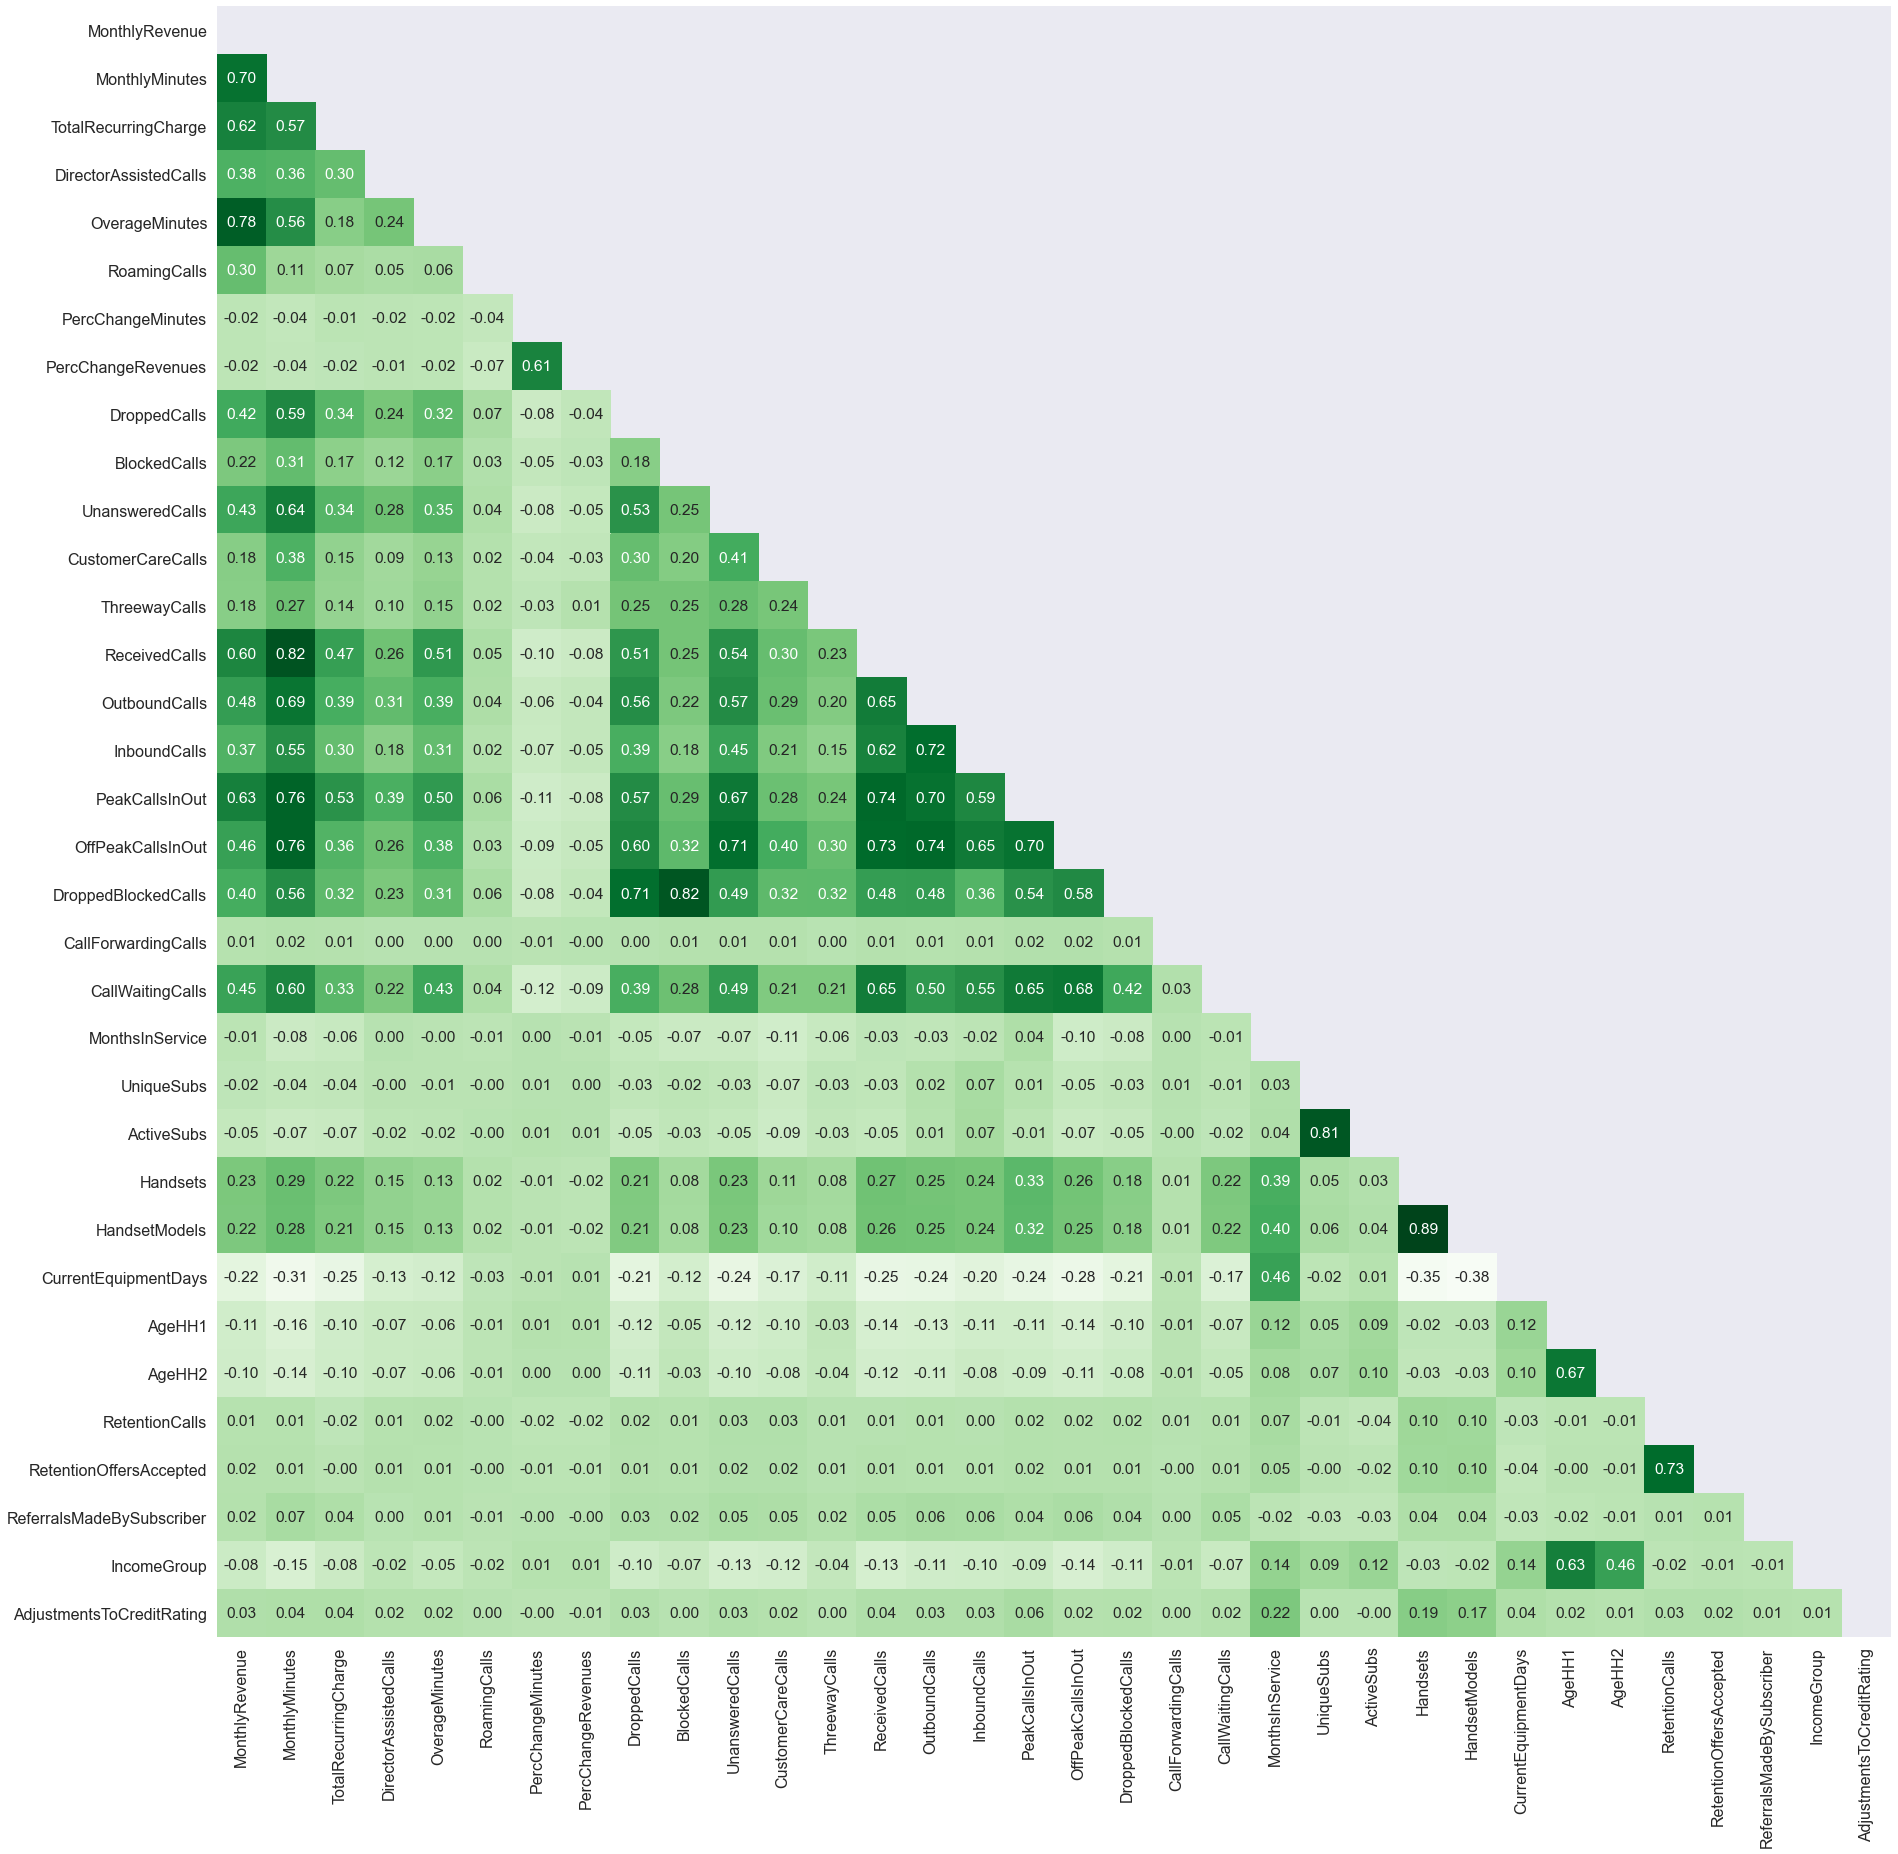

In [34]:
# Triangle Correlation Heatmap - remove those duplicated for upper triangle.
# Use the corr() function to see the correlation between each columns.
clean_corr = clean_df.drop("CustomerID", axis = 1).corr()  # Not included CustomerID as it won't benefits to the results

# Masking to build a triangle correlation heatmap as upper part is duplicate values
mask = np.zeros_like(clean_corr)          # This will create an array of zeros that is like whatever array is passed into this func as a parameter, in our case it's going to be return value
tri_indices = np.triu_indices_from(mask)  # This will retrieve the indices for the upper triangle of the array.
mask[tri_indices] = True                  # Use mask to select just those cells we want, so we can set it True here.

# Visualize the triangle correlation heatmap
sns.set(font_scale = 1.3)
sns.heatmap(clean_corr, mask = mask, annot = True, cmap = "Greens", cbar = False,
            fmt = ".2f", xticklabels = True, yticklabels = True)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
hm = plt.gcf()
hm.set_size_inches(30, 30);

### Interpretation:
`There are few strong positive correlation between Handset and HandsetModel, BlockedCalls and DropBlockedCalls, ReceivedCalls and MonthlyMinutes, ActiveSubs and UniqueSubs.`

<a id='Q3'><h2>Q3. Create additional features to help predict churn</h2></a>

In [35]:
# Wrapper function to create additional features for churn prediction
def create_features(df):
    
    # 3.1 Percent of current active subs over total subs
    df["perc_active_subs"] = df["ActiveSubs"] / df["UniqueSubs"]
    
    # 3.2 Percent of recurrent charge to monthly charge
    # Type your code here to create a new column in df
    df["perc_recurrent_charge"] = df["TotalRecurringCharge"] / df["MonthlyRevenue"]  
    
    # 3.3 Percent of overage minutes over total monthly minutes
    # Type your code here to create a new column in df
    df["perc_overage_minutes"] = df["OverageMinutes"] / df["MonthlyMinutes"]
    
    # Type your code here to creat any other additional features which you think will help improve your model accuracy
    
    return df

In [36]:
# Call the feature engineering wrapper function for churn prediction
clean_df = create_features(clean_df)
clean_df.head()  # Last 3 columns added

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.0,...,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.0,...,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN


In [37]:
# After creating 3 new columns, there are 720 NaNs in perc_overage_minutes. Because zero divide value = NaN
clean_df.isna().sum()

CustomerID                 0
Churn                      0
MonthlyRevenue             0
MonthlyMinutes             0
TotalRecurringCharge       0
                        ... 
Occupation                 0
MaritalStatus              0
perc_active_subs           0
perc_recurrent_charge      0
perc_overage_minutes     715
Length: 61, dtype: int64

In [38]:
# Fill the NaN as zero
clean_df.fillna(0, inplace = True)

In [39]:
# Check the NaN again
clean_df.isna().sum().sum()

0

In [40]:
# Make a copy - Checkpoint
encoded_df = clean_df.copy()

<a id='Q4'><h2>Q4. Build classification model to predict customer churn month in advance</h2></a>

### Initial data processing for model building exercise

In [41]:
# CustomerID is not needed for our training model so we drop this column
encoded_df.drop(["CustomerID"], axis = 1, inplace = True)

In [42]:
# Examine the object type for the DF
obj_list = encoded_df.select_dtypes(include = "O").columns
obj_list

# Encoding all the object type, we will use Scikit_learn's LabelEncoder instead of pd.get_dummies()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for obj in obj_list:
    encoded_df[obj] = le.fit_transform(encoded_df[obj].astype(str))

encoded_df.head()

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,8,1,0,2,4,0,0.5,0.916667,0.0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,8,0,3,2,4,2,1.0,1.000589,0.0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,15,0,2,3,1,2,1.0,1.000000,0.0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.0,52.0,...,0,0,0,3,0,3,0,1.0,0.911522,0.0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.0,0.0,...,1,0,0,0,0,4,2,1.0,0.991832,0.0


### Label Encoder will replace the object type to numeric where:
* Churn Yes to 1; 
* Churn No to 0.

In [43]:
# Check again any Object type variables - It's empty now
encoded_df.select_dtypes(include = "O").columns

# Check how many rows and columns after encoding
encoded_df.shape

Index([], dtype='object')

(50164, 60)

In [44]:
# Train test split to train and test model accuracy
from sklearn.model_selection import train_test_split


# Define columns to be included in X and y
X = encoded_df.drop(["Churn"], axis = 1)  # Features are the rest of the columns
y = encoded_df["Churn"]                   # Target is Churn

In [45]:
# Train, test, split - Test 33% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (33609, 59)
y_train: (33609,)
X_test: (16555, 59)
y_test: (16555,)


In [46]:
# Feature scaling for all continuous variable
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train[0][:5]  # Display 5 items, it's 2-D array, so there's need of [0].

X_test = sc.fit_transform(X_test)
X_test[0][:5]  # Display 5 items

array([ 1.51093268,  0.57652987, -0.93043017, -0.36322458,  2.0712867 ])

array([-0.16169697,  0.01566051,  0.58469905,  0.00781582, -0.39649525])

In [47]:
# StandardScaler stripped the column header off, we want to retain it as easier for the process after prediction.
# Use original X's columns, we can put the column headers back on.
X_train = pd.DataFrame(X_train, columns = X.columns)
X_train.head()

X_test = pd.DataFrame(X_test, columns = X.columns)
X_test.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,1.510933,0.576530,-0.930430,-0.363225,2.071287,-0.120072,-0.456703,0.029155,1.834489,-0.118082,...,-0.142589,0.534328,-0.185069,0.068606,1.587804,0.949741,-0.148131,0.368563,-2.423498,1.923091
1,-0.288377,0.367872,-0.063703,4.184643,-0.296348,-0.120072,-0.136558,-0.174312,0.825611,-0.273517,...,-0.142589,0.726411,-0.185069,0.068606,0.736831,3.218307,-1.436903,0.368563,0.279034,-0.399790
2,-0.908538,-0.696871,-1.580476,-0.363225,-0.106490,-0.091060,0.140110,0.156322,-0.531156,-0.364949,...,-0.142589,0.726411,-0.185069,-0.563805,-0.965115,2.084024,1.140642,0.368563,-1.330718,1.092577
3,-0.580879,-0.767073,-0.713748,-0.186402,-0.430365,-0.120072,-0.065415,-0.047145,-0.681908,-0.364949,...,-0.142589,0.726411,-0.185069,-0.563805,-0.965115,-0.184542,-0.148131,-2.662696,-0.003535,-0.552572
4,0.935772,1.247356,0.586343,1.907173,1.222512,-0.120072,1.140068,2.012964,1.556177,-0.246087,...,-0.142589,-1.770669,-0.185069,-0.563805,-0.965115,-0.184542,-0.148131,-2.662696,-1.008956,0.595963


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,-0.161697,0.015661,0.584699,0.007816,-0.396495,-0.181056,-0.354130,0.005486,-0.428043,0.525644,...,-0.135071,0.339608,-0.191732,-1.185026,0.732027,-0.18035,1.134773,0.370850,0.957240,-0.542797
1,0.136643,1.897058,0.412640,-0.535628,0.040720,-0.181056,-0.813553,-0.334445,0.847509,-0.302022,...,-0.135071,0.339608,-0.191732,-0.549992,-0.968964,-0.18035,-0.155308,-3.667778,-0.067281,-0.289052
2,0.052397,-0.862851,0.154552,-0.352032,-0.396495,1.761032,-0.184868,-0.306117,-0.286315,-0.302022,...,-0.135071,0.722906,-0.191732,-1.185026,0.732027,-0.18035,-1.445390,0.370850,-0.234799,-0.542797
3,-0.532041,-0.258751,-0.060522,-0.535628,-0.396495,-0.181056,-0.426670,0.033813,-0.428043,-0.371825,...,-0.135071,-0.618637,-0.191732,-1.185026,-0.968964,-0.18035,-0.155308,0.370850,1.275761,-0.542797
4,0.143603,0.142008,0.584699,2.005338,-0.396495,-0.181056,-0.301739,0.147124,-0.460750,0.166656,...,2.341229,0.339608,-0.191732,0.085042,0.732027,-0.18035,-0.155308,-2.658121,0.136829,-0.542797


<a id="4.1"><h3>4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set</h3></a>

In [48]:
# %%time
# # THIS CELL IS FOR HYPERPARAMETER TUNING #

# penalty = ["l1", "l2"] 
# C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# class_weight = [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}] 
# solver = ["liblinear", "saga"] 

# param_grid = dict(penalty = penalty, C = C, class_weight = class_weight, solver = solver) 
# grid = GridSearchCV(LogisticRegression(), param_grid = param_grid, scoring = "roc_auc", verbose = 1, n_jobs = -1) 
# grid_result = grid.fit(X_train, y_train) 

# print(f"Best Score: {grid_result.best_score_}")
# print(f"Best Params: {grid_result.best_params_}")

Attached pic for the proof of Hyperparameter Tuning in GridSearch for Logistic Regression:
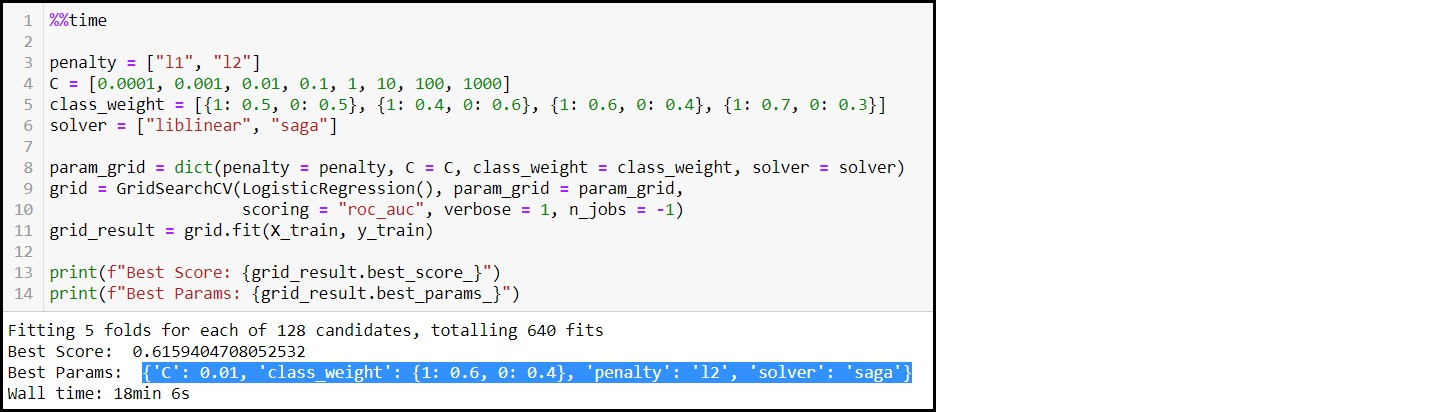

In [49]:
#-------------------------------- Model training -------------------------------#
# Type your code to build logistic regression model on training data set

# Fitting Logistic Regression to the Training set
lr = LogisticRegression(C = 0.01, class_weight = {1: 0.6, 0: 0.4}, penalty = "l2", solver = "saga", random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight={0: 0.4, 1: 0.6}, random_state=42,
                   solver='saga')

In [50]:
#-------------------------------- Model testing ---------------------------------#
# Predicting the Test set results
lr_y_pred = lr.predict(X_test)
lr_y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [51]:
# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
lr_probabilities = lr.predict_proba(X_test)
lr_probabilities


# Convert it to DF
pred_cust = pd.DataFrame(lr_probabilities, columns = ["Retained", "Prob of Churn"])  # 0 - Non-Churn, 1 = Churn
pred_cust

array([[0.73193405, 0.26806595],
       [0.62795065, 0.37204935],
       [0.57090693, 0.42909307],
       ...,
       [0.56129743, 0.43870257],
       [0.48717068, 0.51282932],
       [0.56291326, 0.43708674]])

,Retained,Prob of Churn
0,0.731934,0.268066
1,0.627951,0.372049
2,0.570907,0.429093
3,0.605014,0.394986
4,0.760710,0.239290
...,...,...
16550,0.669830,0.330170
16551,0.590858,0.409142
16552,0.561297,0.438703
16553,0.487171,0.512829


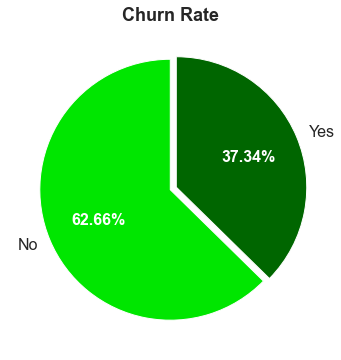

In [52]:
# Count the percetage
pred_retained = pred_cust["Retained"].sum() / len(pred_cust)   # 16792
pred_prob = pred_cust["Prob of Churn"].sum() / len(pred_cust)  # 16792

# Visualize it
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(121)

_, _, autotxt = ax.pie([pred_retained, pred_prob], explode= [0, 0.05], labels = ("No", "Yes"),
                        autopct = "%.2f%%", startangle = 90, textprops = {"fontsize": 16},
                        colors = ["#00e600", "#006600"])
plt.setp(autotxt, size = 16, weight = 800, color = "w")
ax.set_title("Churn Rate", fontdict = {"fontsize": 18, "fontweight": 600});

In [53]:
# Evaluate model accuracy using fitted y value and actual y_test
# Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix

def score_model(probs, threshold): 
    return np.array([1 if x > threshold else 0 for x in probs[:, 1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metric = metrics.precision_recall_fscore_support(labels, scores)
    conf = metrics.confusion_matrix(labels, scores)                  # confusion_matrix(y_test, y_pred)

    print("                        Confusion matrix")
    print("                 Score positive    Score negative")
    print(f"Actual positive      {conf[0, 0]}              {conf[0, 1]}")
    print(f"Actual negative      {conf[1, 0]}               {conf[1, 1]}")
    print("")
    print(f"Accuracy         {metrics.accuracy_score(labels, scores):.2f}")
    print(f"AUC              {metrics.roc_auc_score(labels, probs[:, 1]):.2f}")
    print(f"Macro precision  {float((float(metric[0][0]) + float(metric[0][1])) / 2.0):.2f}")
    print(f"Macro recall     {float((float(metric[1][0]) + float(metric[1][1])) / 2.0):.2f}")
    print("")
    print("           Positive      Negative")
    print(f"Num case     {metric[3][0]}          {metric[3][1]}")
    print(f"Precision    {metric[0][0]:.2f}          {metric[0][1]:.2f}")
    print(f"Recall       {metric[1][0]:.2f}          {metric[1][1]:.2f}")
    print(f"F1           {metric[2][0]:.2f}          {metric[2][1]:.2f}")


print_metrics(y_test, lr_probabilities, 0.5)

                        Confusion matrix
                 Score positive    Score negative
Actual positive      10987              799
Actual negative      4135               634

Accuracy         0.70
AUC              0.62
Macro precision  0.58
Macro recall     0.53

           Positive      Negative
Num case     11786          4769
Precision    0.73          0.44
Recall       0.93          0.13
F1           0.82          0.20


In [54]:
# Compound all results in DataFrame

# Evaluate GINI 
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0

    for i, j in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(j - x[i:]))
    return diffsum / (len(x) ** 2 * np.mean(x))


# Evaluate all metrics
accuracy = f"{accuracy_score(y_test, lr_y_pred):.2f}"
gini_coef = f"{gini_coefficient(lr_probabilities):.2f}"
precision = f"{metrics.precision_score(y_test, lr_y_pred):.2f}"
recall = f"{metrics.recall_score(y_test, lr_y_pred):.2f}"
f1_score = f"{metrics.f1_score(y_test, lr_y_pred):.2f}"
mae = f"{metrics.mean_absolute_error(y_test, lr_y_pred):.2f}"
mse = f"{metrics.mean_squared_error(y_test, lr_y_pred):.2f}"
rmse = f"{np.sqrt(float(mse)):.2f}"
# lr_proba = lr.predict_proba(X_test)[::, 1]
auc = f"{metrics.roc_auc_score(y_test, lr_probabilities[::, 1]):.2f}"  # Select 1 = Churn


# And then compund all results and convert to transposed DataFrame
pd.DataFrame([["Logistic Regression", accuracy, gini_coef, precision, recall, f1_score, mae, mse, rmse, auc]], 
             columns = ["Model", "Accuracy", "GINI",  "Precision", "Recall", "F1 Score", 
                        "Mean Absolute Error", "Mean Squared Error", "Root Mean Square Error",
                        "Area under the ROC Curve (AUC)"]).set_index("Model").T


# Classification Report
print(f"\nClassification Report:\n {classification_report(y_test, lr_y_pred)}")

Model,Logistic Regression
Accuracy,0.70
GINI,0.21
Precision,0.44
Recall,0.13
F1 Score,0.20
Mean Absolute Error,0.30
Mean Squared Error,0.30
Root Mean Square Error,0.55
Area under the ROC Curve (AUC),0.62



Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82     11786
           1       0.44      0.13      0.20      4769

    accuracy                           0.70     16555
   macro avg       0.58      0.53      0.51     16555
weighted avg       0.64      0.70      0.64     16555



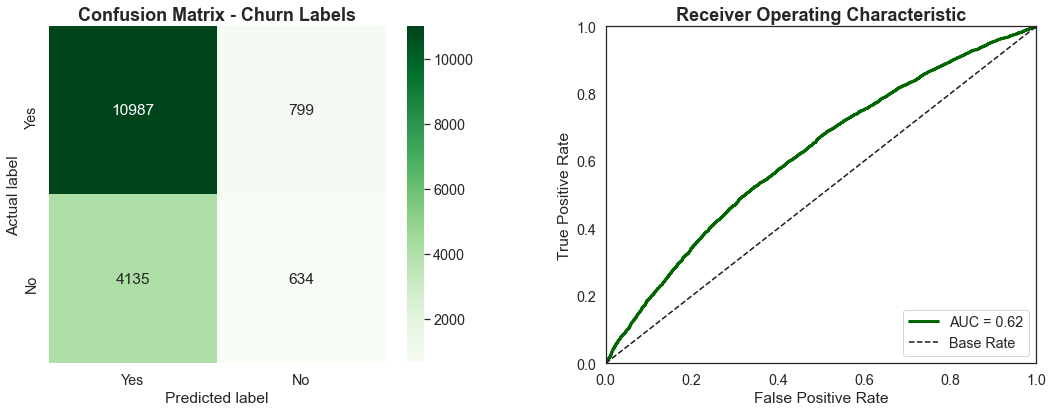

In [55]:
# 1st Plot - Visualize Confusion Matrix in heatmap
cm = confusion_matrix(y_test, lr_y_pred)

fig = plt.figure(figsize = (15, 6))
ax1 = plt.subplot(121)
sns.heatmap(cm, ax = ax1, square = True, annot = True, cmap = "Greens", fmt = "g",
            xticklabels = ["Yes", "No"], yticklabels = ["Yes", "No"])
ax1.set_title("Confusion Matrix - Churn Labels", weight = "bold", fontsize = 18)
ax1.set_xlabel("Predicted label")
ax1.set_ylabel("Actual label");


# 2nd Plot - ROC Graph - ROC Curve is a plot of the true positive rate against the false positive rate. /
# It shows the tradeoff between sensitivity and specificity. 
# y_pred_proba = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, lr_probabilities[::, 1])  # Select 1 = Churn
auc = metrics.roc_auc_score(y_test, lr_probabilities[::, 1])      # Select 1 = Churn

sns.set_style("white")
ax2 = plt.subplot(122)
ax2.plot(fpr, tpr, color = "#006600", lw = 3, label = f"AUC = {auc:.2f}")
ax2.plot([0, 1], [0, 1], color = "k", ls = "--",  label = "Base Rate")
ax2.legend(loc= 4)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_title("Receiver Operating Characteristic", weight = "bold", fontsize = 18)
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
plt.tight_layout(w_pad = 5);

### Interpretation:
`AUC score for the Logistic Regression is 0.62; and Accuracy for our model Logistic Regression is 70%.`

In [56]:
lr.coef_.shape

(1, 59)

CurrentEquipmentDays         0.315634
PercChangeRevenues           0.112981
OverageMinutes               0.091554
MadeCallToRetentionTeam      0.084858
HandsetRefurbished           0.083850
RetentionCalls               0.078532
Handsets                     0.064740
ChildrenInHH                 0.054220
HasCreditCard                0.052212
DroppedCalls                 0.042744
UniqueSubs                   0.039534
RoamingCalls                 0.038065
MaritalStatus                0.036031
OutboundCalls                0.032587
UnansweredCalls              0.026965
perc_overage_minutes         0.025169
HandsetModels                0.022489
OwnsComputer                 0.018281
OwnsMotorcycle               0.016934
DroppedBlockedCalls          0.015961
CallWaitingCalls             0.014326
PrizmCode                    0.014132
BlockedCalls                 0.011811
ServiceArea                  0.009383
NotNewCellphoneUser          0.007529
ReceivedCalls                0.004068
TotalRecurri

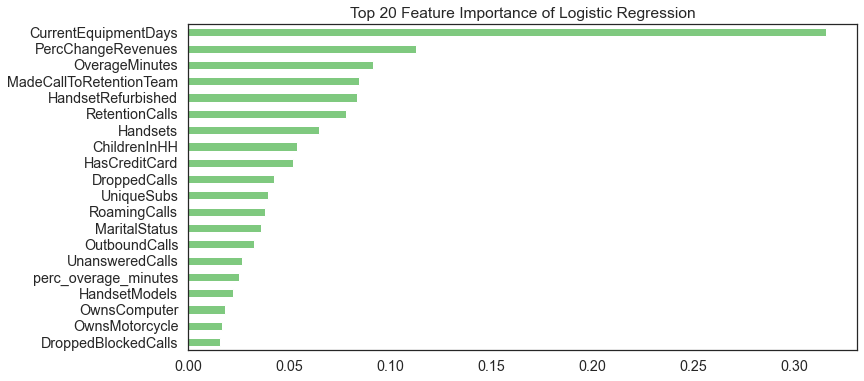

In [57]:
# Logistic Regression Coefficients. The coef_ attribute is also used to view the model's coefficients.

# Select the array of
coef = pd.Series(lr.coef_[0], X.columns)

# Display all coef_ from highest to lowest
coef = coef.sort_values(ascending = False)
print(coef)

# Visualize the Top 20 feature importances
coef.nlargest(20).sort_values().plot(kind = "barh", figsize = (12, 6), cmap = "Accent", 
                          title = "Top 20 Feature Importance of Logistic Regression");

### Feature Selection: There are several methods for feature selection, here we will be using:
* Eliminate some low coefficients variables
* Eliminate the low variance variables

In [58]:
coef.index[23:36]  # Display only, we manually select some low coefficient of the variables

Index(['ServiceArea', 'NotNewCellphoneUser', 'ReceivedCalls',
       'TotalRecurringCharge', 'Homeownership', 'OptOutMailings',
       'OffPeakCallsInOut', 'RVOwner', 'DirectorAssistedCalls', 'NonUSTravel',
       'Occupation', 'BuysViaMailOrder', 'ReferralsMadeBySubscriber'],
      dtype='object')

In [59]:
# Here we will try to drop some of the low coefficient variables and see whether it improves our model accuracy. 

# Select those extremely lowest coefficients
cols_to_drop = coef.index[24:37]

# Drop and assign back to X_train and X_test
X_train = X_train.drop(cols_to_drop, axis = 1)
X_test = X_test.drop(cols_to_drop, axis = 1)

In [60]:
# Train the model again
lr.fit(X_train, y_train)

# Predict the model
lr_y_pred2 = lr.predict(X_test)

# See the Accuracy Score 
score = metrics.accuracy_score(lr_y_pred2, y_test)

print(f"Accuracy Score (Some Low Coef. Removed): {score:.1%}")

LogisticRegression(C=0.01, class_weight={0: 0.4, 1: 0.6}, random_state=42,
                   solver='saga')

Accuracy Score (Some Low Coef. Removed): 70.2%


`The accuracy score after removing of low coefficient neither improve nor descrease.`

### We will now try using another method which is remove columns that have a low variance

In [61]:
X2 = X

# Define the transform
transform = VarianceThreshold()

# Define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

# Transform the input data
X2 = transform.fit_transform(X2)  # Use another variable name as X2
# print(X.shape, y.shape)         # Shape of original X
print(X2.shape)                   # Shape of newly created X2

(50164, 59)


> Threshold = 0.00, Features = 59
> Threshold = 0.05, Features = 52
> Threshold = 0.10, Features = 47
> Threshold = 0.15, Features = 44
> Threshold = 0.20, Features = 40
> Threshold = 0.25, Features = 36
> Threshold = 0.30, Features = 36
> Threshold = 0.35, Features = 36
> Threshold = 0.40, Features = 34
> Threshold = 0.45, Features = 34
> Threshold = 0.50, Features = 34


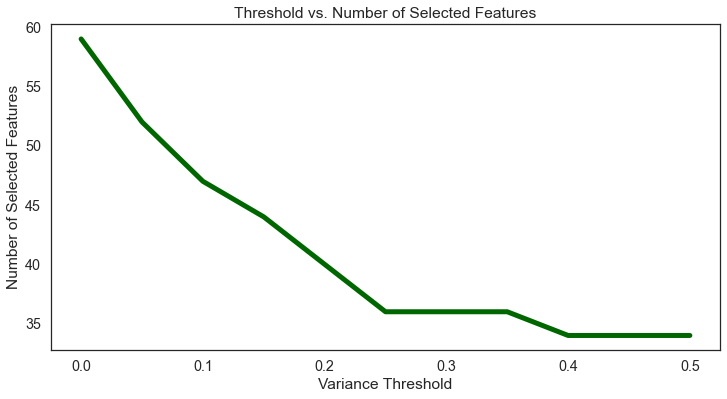

In [62]:
# Apply transform with each threshold
results = []

for t in thresholds:
    
    # Define the transform
    transform = VarianceThreshold(threshold = t)
    
    # Transform the input data
    X2 = transform.fit_transform(X2)
    
    # Determine the number of input features
    n_features = X2.shape[1]
    print(f"> Threshold = {t:.2f}, Features = {n_features}")
    
    # Store the result
    results.append(n_features)
    

# Plot the threshold vs. the number of selected features
sns.set_style("white")
plt.figure(figsize = (12, 6))
plt.plot(thresholds, results, lw = 5, c = "#006600")
plt.title("Threshold vs. Number of Selected Features")
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Selected Features");

In [63]:
# Check the shape of X2 after removing low variances - X2 now reduced to 34 columns
X2.shape

(50164, 34)

In [64]:
# Train, test, split for X2 and y - Because the previous Coef being removed 5 columns for testing
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.33, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (33609, 34)
y_train: (33609,)
X_test: (16555, 34)
y_test: (16555,)


In [65]:
# Train the model again
lr.fit(X_train, y_train)

# Predict the model
y_pred3 = lr.predict(X_test)

# See the Accuracy Score 
score = metrics.accuracy_score(y_pred3, y_test)

print(f"Accuracy Score (Low Variances Removed): {score:.1%}")

LogisticRegression(C=0.01, class_weight={0: 0.4, 1: 0.6}, random_state=42,
                   solver='saga')

Accuracy Score (Low Variances Removed): 70.1%


`The accuracy score also neither improve nor decrease after low variance column removed.`

<a id="4.2"><h3>4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model</h3></a>

In [66]:
# Because of the feature selection on Logistic Regression, it affect the columns of X_train and X_test, so we /
# reassign the X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Make DF
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [67]:
# %%time
# # THIS CELL IS FOR HYPERPARAMETER TUNING #

# parameters = {
#     "n_estimators":[5, 10, 50, 100, 250],
#     "max_depth":[2, 4, 8, 16, 32, None]
# }

# from sklearn.model_selection import GridSearchCV
# cv = GridSearchCV(rfc, parameters, cv = 5)

# cv.fit(X_train, y_train.ravel())

# # Display Results
# def display(results):
#     print(f'Best parameters are: {results.best_params_}')
#     print("\n")
#     mean_score = results.cv_results_['mean_test_score']
#     std_score = results.cv_results_['std_test_score']
#     params = results.cv_results_['params']
#     for mean,std,params in zip(mean_score,std_score,params):
#         print(f"{round(mean, 3)} + or -{round(std,3)} for the {params}")

# display(cv)

Attached pic for the proof of Hyperparameter Tuning in GridSearch for Random Forest Classifier:

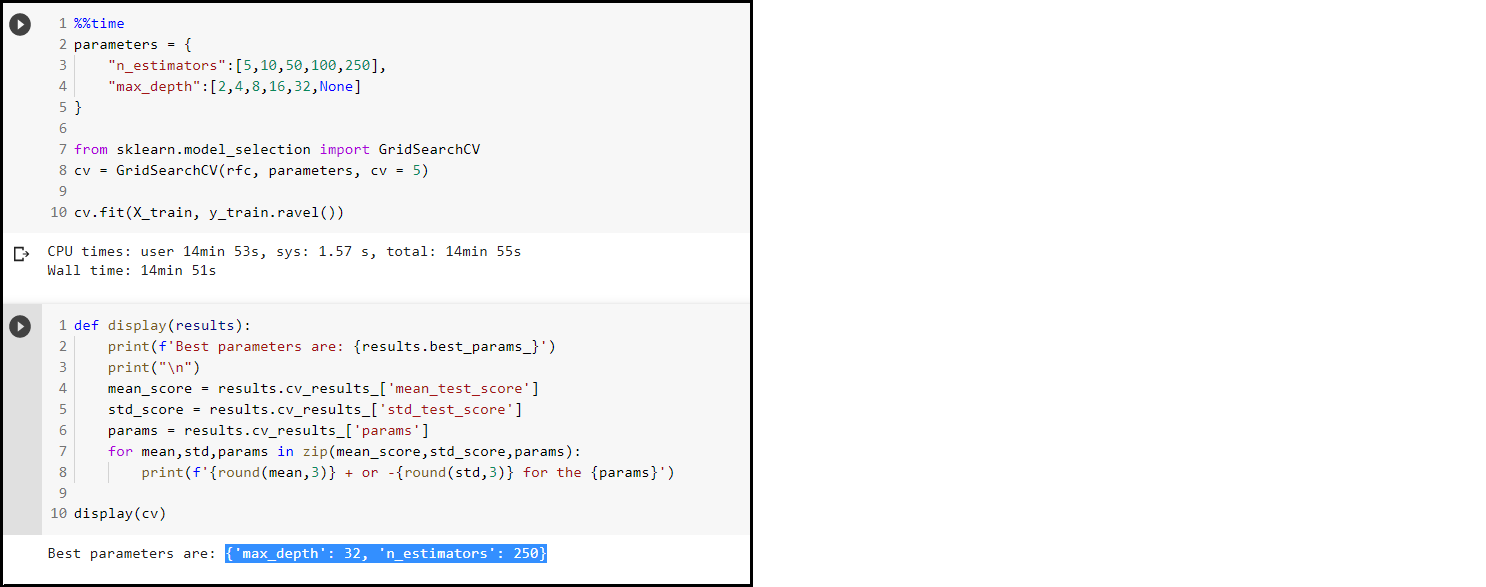

In [68]:
#-------------------------------- Model training -------------------------------#
# Type your code to build random forest classifier model on training data set

rfc = RandomForestClassifier(max_depth = 32, n_estimators = 250)  

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, n_estimators=250)

In [69]:
#-------------------------------- Model testing ---------------------------------#
# Type your code here to predict for X_test data set using the fitted RF model
rfc_y_pred = rfc.predict(X_test)


# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
rfc_probabilities = rfc.predict_proba(X_test)
rfc_probabilities


# Convert it in DF
pred_cust = pd.DataFrame(rfc_probabilities, columns = ["Retained", "Prob of Churn"])  # 0 = Non-Churn, 1 = Churn
pred_cust

array([[0.79548062, 0.20451938],
       [0.64      , 0.36      ],
       [0.54324706, 0.45675294],
       ...,
       [0.736     , 0.264     ],
       [0.5851476 , 0.4148524 ],
       [0.732     , 0.268     ]])

,Retained,Prob of Churn
0,0.795481,0.204519
1,0.640000,0.360000
2,0.543247,0.456753
3,0.671997,0.328003
4,0.762921,0.237079
...,...,...
16550,0.828000,0.172000
16551,0.675388,0.324612
16552,0.736000,0.264000
16553,0.585148,0.414852


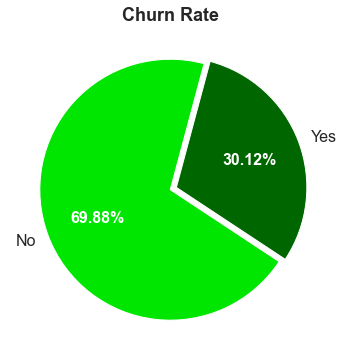

In [70]:
# Count the percetage of Retained and Chuners Probability
pred_retained = pred_cust["Retained"].sum() / len(pred_cust)  # 16792
pred_prob = pred_cust["Prob of Churn"].sum() / len(pred_cust)  #16792

# Visualize it
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(121)

_, _, autotxt = ax.pie([pred_retained, pred_prob], explode= [0, 0.05], labels = ("No", "Yes"), 
                        autopct = "%.2f%%", startangle = 75, textprops = {"fontsize": 16},
                        colors = ["#00e600", "#006600"])
plt.setp(autotxt, size = 16, weight = 800, color = "w")
ax.set_title("Churn Rate", fontdict = {"fontsize": 18, "fontweight": 600});

In [71]:
# Evaluate model accuracy using fitted y value and actual y_test
# Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix

def score_model(probs, threshold): 
    return np.array([1 if x > threshold else 0 for x in probs[:, 1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metric = metrics.precision_recall_fscore_support(labels, scores)
    conf = metrics.confusion_matrix(labels, scores)                  # confusion_matrix(y_test, y_pred)

    print("                        Confusion matrix")
    print("                 Score positive    Score negative")
    print(f"Actual positive      {conf[0, 0]}              {conf[0, 1]}")
    print(f"Actual negative      {conf[1, 0]}              {conf[1, 1]}")
    print("")
    print(f"Accuracy         {metrics.accuracy_score(labels, scores):.2f}")
    print(f"AUC              {metrics.roc_auc_score(labels, probs[:, 1]):.2f}")
    print(f"Macro precision  {float((float(metric[0][0]) + float(metric[0][1])) / 2.0):.2f}")
    print(f"Macro recall     {float((float(metric[1][0]) + float(metric[1][1])) / 2.0):.2f}")
    print("")
    print("           Positive      Negative")
    print(f"Num case     {metric[3][0]}          {metric[3][1]}")
    print(f"Precision    {metric[0][0]:.2f}          {metric[0][1]:.2f}")
    print(f"Recall       {metric[1][0]:.2f}          {metric[1][1]:.2f}")
    print(f"F1           {metric[2][0]:.2f}          {metric[2][1]:.2f}")


print_metrics(y_test, rfc_probabilities, 0.5)

                        Confusion matrix
                 Score positive    Score negative
Actual positive      11569              217
Actual negative      4450              319

Accuracy         0.72
AUC              0.66
Macro precision  0.66
Macro recall     0.52

           Positive      Negative
Num case     11786          4769
Precision    0.72          0.60
Recall       0.98          0.07
F1           0.83          0.12


In [72]:
# Compound all results in DataFrame

# Evaluate GINI 
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0

    for i, j in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(j - x[i:]))
    return diffsum / (len(x) ** 2 * np.mean(x))


# Evaluate all metrics
accuracy = f"{accuracy_score(y_test, rfc_y_pred):.2f}"
gini_coef = f"{gini_coefficient(rfc_probabilities):.2f}"
precision = f"{metrics.precision_score(y_test, rfc_y_pred):.2f}"
recall = f"{metrics.recall_score(y_test, rfc_y_pred):.2f}"
f1_score = f"{metrics.f1_score(y_test, rfc_y_pred):.2f}"
mae = f"{metrics.mean_absolute_error(y_test, rfc_y_pred):.2f}"
mse = f"{metrics.mean_squared_error(y_test, rfc_y_pred):.2f}"
rmse = f"{np.sqrt(float(mse)):.2f}"
# y_pred_proba = rfc.predict_proba(X_test)[::,1]
auc = f"{metrics.roc_auc_score(y_test, rfc_probabilities[::, 1]):.2f}"


# Compund all result and convert to transposed DataFrame
pd.DataFrame([["Random Forest Classifier", accuracy, gini_coef, precision, recall, f1_score, mae, mse, rmse, auc]], 
             columns = ["Model", "Accuracy", "GINI",  "Precision", "Recall", "F1 Score", 
                        "Mean Absolute Error", "Mean Squared Error", "Root Mean Square Error",
                        "Area under the ROC Curve (AUC)"]).set_index("Model").T

                        
# Classification Report
print(f"\nClassification Report:\n {classification_report(y_test, rfc_y_pred)}")

Model,Random Forest Classifier
Accuracy,0.72
GINI,0.24
Precision,0.60
Recall,0.07
F1 Score,0.12
Mean Absolute Error,0.28
Mean Squared Error,0.28
Root Mean Square Error,0.53
Area under the ROC Curve (AUC),0.66



Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83     11786
           1       0.60      0.07      0.12      4769

    accuracy                           0.72     16555
   macro avg       0.66      0.52      0.48     16555
weighted avg       0.69      0.72      0.63     16555



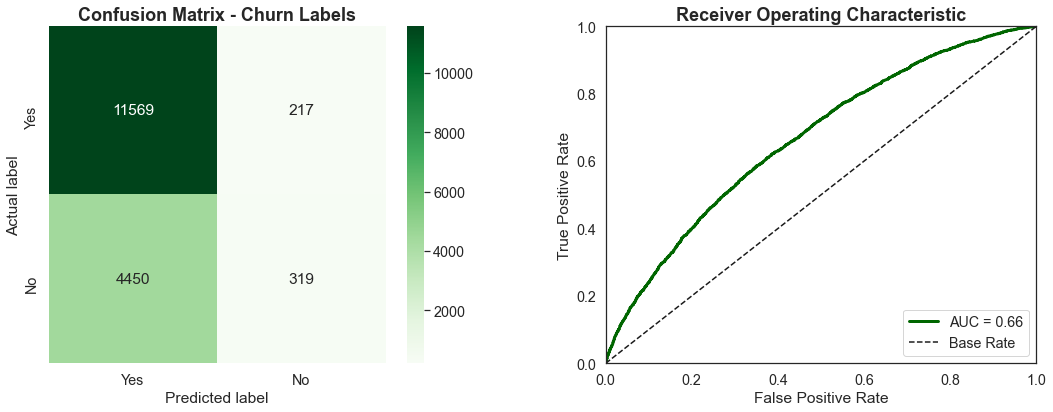

In [74]:
# Visualize Confusion Matrix in heatmap
cm = confusion_matrix(y_test, rfc_y_pred)

fig = plt.figure(figsize = (15, 6))
ax1 = plt.subplot(121)
sns.heatmap(cm, ax = ax1, square = True, annot = True, cmap = "Greens", fmt = "g", 
            xticklabels = ["Yes", "No"], yticklabels = ["Yes", "No"])
ax1.set_title("Confusion Matrix - Churn Labels", weight = "bold", fontsize = 18)
ax1.set_xlabel("Predicted label")
ax1.set_ylabel("Actual label");


# Plot ROC Graph - ROC Curve is a plot of the true positive rate against the false positive rate.
# It shows the tradeoff between sensitivity and specificity. 
# y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, rfc_probabilities[::, 1])
auc = metrics.roc_auc_score(y_test, rfc_probabilities[::, 1])

sns.set_style("white")
ax2 = plt.subplot(122)
ax2.plot(fpr, tpr, color = "#006600", lw = 3, label = f"AUC = {auc:.2f}")
ax2.plot([0, 1], [0, 1], color = "k", ls = "--",  label = "Base Rate")
ax2.legend(loc= 4)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_title("Receiver Operating Characteristic", weight = "bold", fontsize = 18)
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
plt.tight_layout(w_pad = 5);

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

`Among two models Logistic Regression (LR) and Random Forest Classifier (RFC), our model RFC has better accuracy of 72% using Hyperparameter Tuning based on GridSearch.`

<a id="4.3"><h3>4.3 Identify most important features impacting churn</h3></a>

In [75]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

ft_impt = pd.Series(rfc.feature_importances_, index = X.columns)  # Build a Series or DF also can
ft_impt = ft_impt.sort_values(ascending = False)
ft_impt  # Display all items

CurrentEquipmentDays         0.054966
PercChangeMinutes            0.047136
MonthlyMinutes               0.045158
perc_recurrent_charge        0.041805
MonthsInService              0.040864
MonthlyRevenue               0.039478
ServiceArea                  0.039182
PeakCallsInOut               0.034751
OffPeakCallsInOut            0.034241
ReceivedCalls                0.033527
UnansweredCalls              0.032943
OutboundCalls                0.032140
PercChangeRevenues           0.031992
DroppedBlockedCalls          0.029244
DroppedCalls                 0.027535
TotalRecurringCharge         0.026673
AgeHH1                       0.026066
perc_overage_minutes         0.025283
InboundCalls                 0.025198
BlockedCalls                 0.023614
OverageMinutes               0.021517
AgeHH2                       0.019255
DirectorAssistedCalls        0.019235
IncomeGroup                  0.018650
RoamingCalls                 0.017909
CreditRating                 0.017473
CustomerCare

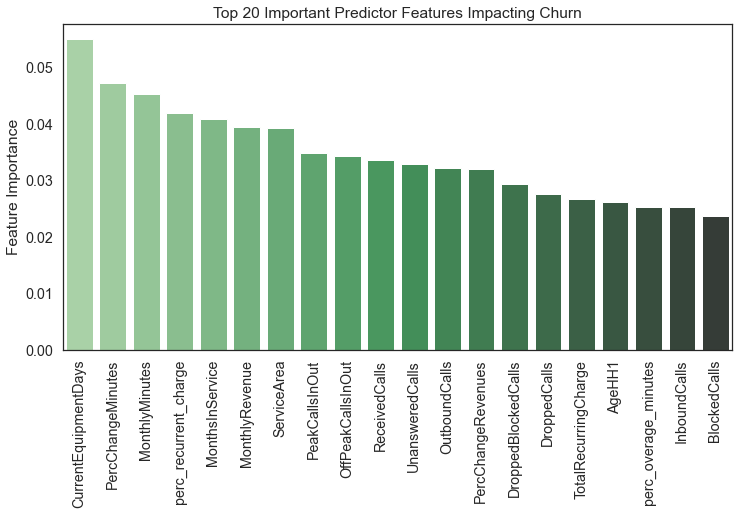

In [76]:
# Get the top 20 values from feature importances
top_20 = ft_impt.nlargest(20)  # Select top 20 or use sort_values() + slicing method

# Plot the barplot
plt.figure(figsize = (12, 6))
sns.barplot(x = top_20.index, y = top_20.values, palette = ("Greens_d"))
plt.xticks(rotation = 90)
plt.title("Top 20 Important Predictor Features Impacting Churn")
plt.ylabel("Feature Importance");

In [77]:
# Slice the Series and get all the extremely low feature importances
ft_impt.index[-29:]  # Display only

Index(['Occupation', 'ThreewayCalls', 'UniqueSubs', 'Handsets',
       'MaritalStatus', 'perc_active_subs', 'HandsetModels', 'ActiveSubs',
       'NewCellphoneUser', 'HandsetRefurbished', 'ChildrenInHH',
       'NotNewCellphoneUser', 'OwnsComputer', 'HandsetWebCapable',
       'RespondsToMailOffers', 'HasCreditCard', 'Homeownership',
       'BuysViaMailOrder', 'TruckOwner', 'RVOwner',
       'ReferralsMadeBySubscriber', 'MadeCallToRetentionTeam',
       'RetentionCalls', 'NonUSTravel', 'AdjustmentsToCreditRating',
       'OwnsMotorcycle', 'OptOutMailings', 'RetentionOffersAccepted',
       'CallForwardingCalls'],
      dtype='object')

In [78]:
# Here we will try to drop some of the low coefficient variables and see whether it improves our model accuracy. 

# Select the lowest feature importances
cols_to_drop = ft_impt.index[-29:]

# Assign to X_train and X_test
X_train_1 = X_train.drop(cols_to_drop, axis = 1)
X_test_1 = X_test.drop(cols_to_drop, axis = 1)# 

In [79]:
# Train the model again
rfc.fit(X_train_1, y_train)

# Predict the model
rfc_y_pred = rfc.predict(X_test_1)

# See the Accuracy Score 
score = metrics.accuracy_score(rfc_y_pred, y_test)

print(f"Accuracy Score (Some Low Feature Importances Removed): {score:.1%}")

RandomForestClassifier(max_depth=32, n_estimators=250)

Accuracy Score (Some Low Feature Importances Removed): 71.6%


<b>Interpretation:</b> `Accuracy score neither increase nor reduced.`

<a id='Q5'><h2>Q5. Use the hold out data provided to predict churners using the best model identified in step 4 </h2></a>

In [80]:
# Type your code here to predict churners based on the hold out data set provided
# Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
# Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

# Use "predict" function on the transformend data using the best fitted model object

In [81]:
# For Jupyter Notebook only
# Edit the file location of raw data set
holdout = pd.read_csv("Mini_project_3_Hold_Out_Data.csv")
holdout.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [82]:
# Make a copy
holdout_df = holdout.copy()

In [83]:
# Show only columns that have missing values instead of showing all columns without missing values
for x in holdout_df.columns:
    missing_val = []

    if holdout_df[x].isna().sum() != 0:                           # Show the columns are not zero
        print(f"{x: >21}", f"{holdout_df[x].isna().sum(): > 7}")  # Adjusting result alignment
        missing_val.append(x)

                Churn   20000
       MonthlyRevenue      60
       MonthlyMinutes      60
 TotalRecurringCharge      60
DirectorAssistedCalls      60
       OverageMinutes      60
         RoamingCalls      60
    PercChangeMinutes     135
   PercChangeRevenues     135
          ServiceArea       4
               AgeHH1     335
               AgeHH2     335


### In this missing value list of holdout dataset, the column 'Churn' will be dropped. And we have all NaN in numeric except ServiceArea which is an Object.
* The ServiceArea only has 4 NaNs and we will impute by mode method.
* The rest of the columns are numeric will be imputed by mean value.

In [84]:
# Firstly drop the Churn, and then CustomerID as it won't benefits to our prediction
holdout_df.drop(["CustomerID", "Churn"], axis = 1, inplace = True)

In [85]:
# Straight away impute NaN with most frequent value by using .mode() method
holdout_df["ServiceArea"].fillna(holdout_df["ServiceArea"].mode()[0], inplace = True)

# # Working:
# holdout_df["ServiceArea"].mode()  # Display most frequent Value - "NYCBRO917"

In [86]:
# Third, same as previous dataset, we will impute the NaN values with mean value for those particular columns

na_cols = holdout_df.isna().any()                 # Find any columns that contains NaNs
na_cols = na_cols[na_cols == True].reset_index()  # Reset the index number, those columns will be under column name "index"
na_cols = na_cols["index"].tolist()               # Convert Series to list

# For Loop for all numerical columns only:
for col in holdout_df.columns:
     if col in na_cols:
        if holdout_df[col].dtype != "O":     # Except object
             holdout_df[col] = holdout_df[col].fillna(holdout_df[col].mean()).round(0)  # Fillna with mean value and then 
                                                                                        # round them up to 0 decimal place

In [87]:
# Call the create_features function we created earlier - 3 newly generated columns added at the last 3 columns
holdout_df = create_features(holdout_df)
holdout_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,57.0,483.0,37.0,0.0,23.0,0.0,532.0,51.0,8.3,1.0,...,1,150,No,5-Low,Other,Other,No,1.000000,0.649123,0.047619
1,55.0,570.0,72.0,0.0,0.0,0.0,38.0,0.0,9.7,0.7,...,2,80,No,1-Highest,Other,Professional,No,1.000000,1.309091,0.000000
2,97.0,1039.0,50.0,5.0,420.0,0.0,198.0,23.0,12.7,3.0,...,3,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.515464,0.404235
3,36.0,153.0,30.0,0.0,16.0,0.0,30.0,7.0,2.0,0.7,...,1,200,No,1-Highest,Other,Other,No,0.666667,0.833333,0.104575
4,55.0,1213.0,50.0,1.0,0.0,1.0,169.0,1.0,2.7,6.0,...,0,10,No,1-Highest,Suburban,Other,No,1.000000,0.909091,0.000000


In [88]:
# Check again the NaN values - 2 columns have NaNs because any value divide by zero will return NaN in DF
# Show only columns that have missing values instead of showing all columns without missing values
for x in holdout_df.columns:
    missing_val = []

    if holdout_df[x].isna().sum() != 0:                   # Show the columns are not zero
        print(f"{x}", f"{holdout_df[x].isna().sum(): > 3}")  # Adjusting result alignment
        missing_val.append(x)

perc_recurrent_charge   3
perc_overage_minutes  294


In [89]:
# We will fill all these NaN with 0 value.
holdout_df.fillna(0, inplace = True)

# Check again the NaN value
holdout_df.isna().sum().sum()

0

In [90]:
# Encoding..
# Examine the object type for this DF
obj_list = holdout_df.select_dtypes(include = "object").columns

# Encoding all the object type, we will use Scikit_learn's LabelEncoder instead of pd.get_dummies()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for obj in obj_list:
    holdout_df[obj] = le.fit_transform(holdout_df[obj].astype(str))

holdout_df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,57.0,483.0,37.0,0.0,23.0,0.0,532.0,51.0,8.3,1.0,...,1,3,0,4,0,3,0,1.000000,0.649123,0.047619
1,55.0,570.0,72.0,0.0,0.0,0.0,38.0,0.0,9.7,0.7,...,2,14,0,0,0,4,0,1.000000,1.309091,0.000000
2,97.0,1039.0,50.0,5.0,420.0,0.0,198.0,23.0,12.7,3.0,...,3,0,0,2,2,1,2,1.000000,0.515464,0.404235
3,36.0,153.0,30.0,0.0,16.0,0.0,30.0,7.0,2.0,0.7,...,1,5,0,0,0,3,0,0.666667,0.833333,0.104575
4,55.0,1213.0,50.0,1.0,0.0,1.0,169.0,1.0,2.7,6.0,...,0,0,0,0,2,3,0,1.000000,0.909091,0.000000


In [91]:
# Check how many rows and columns after encoding
holdout_df.shape


# Check again any Object type variables - It's empty now
holdout_df.select_dtypes(include = "object").columns

(20000, 59)

Index([], dtype='object')

In [92]:
# Scaling the holdout_df
new_holdout = sc.transform(holdout_df)
new_holdout

array([[-0.01120706, -0.05935849, -0.40463995, ...,  0.37084996,
        -0.88910567, -0.11873805],
       [-0.05921022,  0.11239553,  1.10087592, ...,  0.37084996,
         1.39445449, -0.54279653],
       [ 0.94885612,  1.03828786,  0.15455166, ...,  0.37084996,
        -1.35157971,  3.05700695],
       ...,
       [ 0.0367961 ,  0.02553143,  0.02550744, ...,  0.37084996,
        -0.37878363,  0.13440713],
       [ 0.0367961 ,  0.02553143,  0.02550744, ...,  0.37084996,
        -0.37878363,  0.13440713],
       [ 0.0367961 ,  0.02553143,  0.02550744, ...,  0.37084996,
        -0.37878363,  0.13440713]])

In [93]:
# Add the header columns for holdout_df
new_holdout = pd.DataFrame(new_holdout, columns = X.columns)
new_holdout

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,-0.011207,-0.059358,-0.404640,-0.535628,-0.157068,-0.181056,2.184790,1.478520,0.258792,-0.302022,...,2.341229,-1.576882,-0.191732,1.355110,-0.968964,-0.180350,-1.445390,0.370850,-0.889106,-0.118738
1,-0.059210,0.112396,1.100876,-0.535628,-0.396495,-0.181056,0.193955,0.033813,0.411422,-0.331937,...,4.817528,0.531257,-0.191732,-1.185026,-0.968964,0.956193,-1.445390,0.370850,1.394454,-0.542797
2,0.948856,1.038288,0.154552,3.136287,3.975660,-0.181056,0.838760,0.685348,0.738487,-0.102584,...,7.293828,-2.151829,-0.191732,0.085042,0.732027,-2.453437,1.134773,0.370850,-1.351580,3.057007
3,-0.515240,-0.710839,-0.705743,-0.535628,-0.229937,-0.181056,0.161714,0.232106,-0.428043,-0.331937,...,2.341229,-1.193584,-0.191732,-1.185026,-0.968964,-0.180350,-1.445390,-1.648464,-0.251718,0.388469
4,-0.059210,1.381796,0.154552,0.198755,-0.396495,-0.017855,0.721889,0.062141,-0.351728,0.196572,...,-0.135071,-2.151829,-0.191732,-1.185026,0.732027,-0.180350,-1.445390,0.370850,0.010412,-0.542797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.660837,0.596071,1.789112,-0.535628,-0.386085,-0.181056,0.040813,0.033813,0.662172,-0.401740,...,-0.135071,-0.235339,-0.191732,-1.185026,-0.968964,-0.180350,-0.155308,-1.648464,0.447088,-0.531870
19996,0.036796,0.025531,0.025507,0.198755,0.019900,-0.017855,0.004543,0.005486,-0.646086,-0.401740,...,-0.135071,0.722906,-0.191732,-1.185026,0.732027,-0.180350,1.134773,0.370850,-0.378784,0.134407
19997,0.036796,0.025531,0.025507,0.198755,0.019900,-0.017855,0.004543,0.005486,-0.646086,-0.401740,...,2.341229,0.722906,-0.191732,-1.185026,0.732027,-0.180350,-1.445390,0.370850,-0.378784,0.134407
19998,0.036796,0.025531,0.025507,0.198755,0.019900,-0.017855,0.004543,0.005486,1.425323,-0.072668,...,-0.135071,-1.576882,-0.191732,0.085042,-0.968964,-0.180350,-0.155308,0.370850,-0.378784,0.134407


In [94]:
ft_impt.index[-29:]  # Display only

Index(['Occupation', 'ThreewayCalls', 'UniqueSubs', 'Handsets',
       'MaritalStatus', 'perc_active_subs', 'HandsetModels', 'ActiveSubs',
       'NewCellphoneUser', 'HandsetRefurbished', 'ChildrenInHH',
       'NotNewCellphoneUser', 'OwnsComputer', 'HandsetWebCapable',
       'RespondsToMailOffers', 'HasCreditCard', 'Homeownership',
       'BuysViaMailOrder', 'TruckOwner', 'RVOwner',
       'ReferralsMadeBySubscriber', 'MadeCallToRetentionTeam',
       'RetentionCalls', 'NonUSTravel', 'AdjustmentsToCreditRating',
       'OwnsMotorcycle', 'OptOutMailings', 'RetentionOffersAccepted',
       'CallForwardingCalls'],
      dtype='object')

In [95]:
# Same as 4.2, we dropped the same columns, set the columns to be dropped
cols_to_drop = ft_impt.index[-29:]

# Drop the low feat importances columns
new_holdout.drop(cols_to_drop, axis = 1, inplace = True)
new_holdout

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ServiceArea,CurrentEquipmentDays,AgeHH1,AgeHH2,IncomeGroup,HandsetPrice,CreditRating,PrizmCode,perc_recurrent_charge,perc_overage_minutes
0,-0.011207,-0.059358,-0.404640,-0.535628,-0.157068,-0.181056,2.184790,1.478520,0.258792,-0.302022,...,-0.198478,-0.563108,-0.063870,-0.888923,0.210092,-1.576882,1.355110,-0.968964,-0.889106,-0.118738
1,-0.059210,0.112396,1.100876,-0.535628,-0.396495,-0.181056,0.193955,0.033813,0.411422,-0.331937,...,0.178801,0.199941,1.123816,-0.888923,0.529502,0.531257,-1.185026,-0.968964,1.394454,-0.542797
2,0.948856,1.038288,0.154552,3.136287,3.975660,-0.181056,0.838760,0.685348,0.738487,-0.102584,...,-0.198478,1.246183,0.301572,0.123741,-0.109319,-2.151829,0.085042,0.732027,-1.351580,3.057007
3,-0.515240,-0.710839,-0.705743,-0.535628,-0.229937,-0.181056,0.161714,0.232106,-0.428043,-0.331937,...,1.393934,-1.318291,0.667014,-0.888923,-0.109319,-1.193584,-1.185026,-0.968964,-0.251718,0.388469
4,-0.059210,1.381796,0.154552,0.198755,-0.396495,-0.017855,0.721889,0.062141,-0.351728,0.196572,...,0.727571,0.097677,1.215177,-0.888923,-0.428730,-2.151829,-1.185026,0.732027,0.010412,-0.542797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.660837,0.596071,1.789112,-0.535628,-0.386085,-0.181056,0.040813,0.033813,0.662172,-0.401740,...,-0.369969,-0.602441,1.489258,1.811514,-1.386963,-0.235339,-1.185026,-0.968964,0.447088,-0.531870
19996,0.036796,0.025531,0.025507,0.198755,0.019900,-0.017855,0.004543,0.005486,-0.646086,-0.401740,...,-0.414066,1.533310,0.118851,0.208130,0.529502,0.722906,-1.185026,0.732027,-0.378784,0.134407
19997,0.036796,0.025531,0.025507,0.198755,0.019900,-0.017855,0.004543,0.005486,-0.646086,-0.401740,...,-0.502261,1.533310,-1.434276,-0.888923,1.168324,0.722906,-1.185026,0.732027,-0.378784,0.134407
19998,0.036796,0.025531,0.025507,0.198755,0.019900,-0.017855,0.004543,0.005486,1.425323,-0.072668,...,-0.467963,-1.381223,-0.155230,1.136405,-0.428730,-1.576882,0.085042,-0.968964,-0.378784,0.134407


In [96]:
new_holdout.shape

(20000, 30)

In [97]:
# Use the RFC to predict the holdout dataset
new_pred = rfc.predict(new_holdout)

In [98]:
# Get the prediction of probability
new_proba = rfc.predict_proba(new_holdout)
new_proba

array([[0.78376159, 0.21623841],
       [0.65710076, 0.34289924],
       [0.66      , 0.34      ],
       ...,
       [0.70130451, 0.29869549],
       [0.78285714, 0.21714286],
       [0.68313725, 0.31686275]])

In [99]:
# Convert to DF
new_proba = pd.DataFrame(new_proba, columns = ["Retained", "Prob of Churn"])
new_proba

,Retained,Prob of Churn
0,0.783762,0.216238
1,0.657101,0.342899
2,0.660000,0.340000
3,0.752000,0.248000
4,0.807631,0.192369
...,...,...
19995,0.819765,0.180235
19996,0.676000,0.324000
19997,0.701305,0.298695
19998,0.782857,0.217143


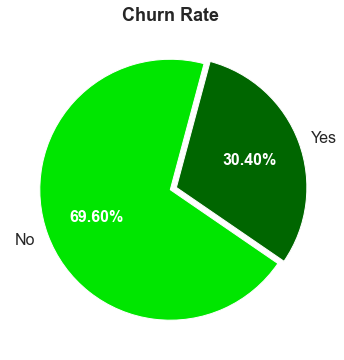

In [100]:
# Count the percetage of Retained and Churners probability
new_proba_retained = new_proba["Retained"].sum() / len(new_proba)  # 16792
new_proba_pred = new_proba["Prob of Churn"].sum() / len(new_proba)  #16792

# Visualize it
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(121)

_, _, autotxt = ax.pie([new_proba_retained, new_proba_pred], explode= [0, 0.05], labels = ("No", "Yes"), 
                        autopct = "%.2f%%", startangle = 75, textprops = {"fontsize": 16},
                        colors = ["#00e600", "#006600"])
plt.setp(autotxt, size = 16, weight = 800, color = "w")
ax.set_title("Churn Rate", fontdict = {"fontsize": 18, "fontweight": 600});

In [101]:
# Show summary of descriptive statistics of Prob. of Churn
new_proba["Prob of Churn"].describe()

count    20000.000000
mean         0.304015
std          0.109656
min          0.012139
25%          0.228282
50%          0.304324
75%          0.380000
max          0.736000
Name: Prob of Churn, dtype: float64

### Interpretation:
* Based on the prediction of holdout data, using Random Forest Classifier model, the average prob of churn is roughly 30%.

<a id='Q6'><h2>Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model)</h2></a>

In [102]:
# Type your code here to plot the lift chart from the best model
# Identify the lift i.e. 3x of capturing churn with and without using the model 
# (Assume: only top 20% high risk customers are to be targetted)

### We will be using RFC as our estimator

In [103]:
# Actual of churners where 0 = No, 1 = Yes
cols = ["Actual_Churners", "Predicted_Probability_of_churners"] 
data = [y_test, rfc_probabilities[::, 1]]

# Make a DataFrame
df1 = pd.DataFrame(dict(zip(cols, data)))
df1

,Actual_Churners,Predicted_Probability_of_churners
4348,0,0.204519
32465,0,0.360000
8310,0,0.456753
9415,0,0.328003
2958,0,0.237079
...,...,...
34486,0,0.172000
21051,0,0.324612
43877,0,0.264000
1956,0,0.414852


In [104]:
df1["Decile_Group"] = pd.qcut(df1["Predicted_Probability_of_churners"], q = 10) # No of quantile. 10 = deciles, 4 = quartiles
df1.head()

,Actual_Churners,Predicted_Probability_of_churners,Decile_Group
4348,0,0.204519,"(0.16, 0.209]"
32465,0,0.360000,"(0.359, 0.392]"
8310,0,0.456753,"(0.439, 0.732]"
9415,0,0.328003,"(0.302, 0.33]"
2958,0,0.237079,"(0.209, 0.244]"


In [105]:
# Groupby deciles and calculate the count and sum of 'actual'
df2 = df1.groupby("Decile_Group").agg(["count", "sum"])["Actual_Churners"].sort_index(ascending = False)
df2

,count,sum
Decile_Group,,
"(0.439, 0.732]",1656,863
"(0.392, 0.439]",1629,667
"(0.359, 0.392]",1682,634
"(0.33, 0.359]",1655,538
"(0.302, 0.33]",1655,450
"(0.274, 0.302]",1656,459
"(0.244, 0.274]",1655,385
"(0.209, 0.244]",1656,351
"(0.16, 0.209]",1636,245


In [106]:
df2.columns = ["Number of Customers", "Number of Churners"]     # No of churners, cummulative of churners
df2["Cumulative Churners"] = df2["Number of Churners"].cumsum()  # Cumulative sum of the churns
df2

,Number of Customers,Number of Churners,Cumulative Churners
Decile_Group,,,
"(0.439, 0.732]",1656,863,863
"(0.392, 0.439]",1629,667,1530
"(0.359, 0.392]",1682,634,2164
"(0.33, 0.359]",1655,538,2702
"(0.302, 0.33]",1655,450,3152
"(0.274, 0.302]",1656,459,3611
"(0.244, 0.274]",1655,385,3996
"(0.209, 0.244]",1656,351,4347
"(0.16, 0.209]",1636,245,4592


In [107]:
# Calculate Gain = Cumulative Percent of Events/ Churns
df2["Percent of Events"] = df2["Number of Churners"] / df2["Number of Churners"].sum() * 100
df2["Gain"] = df2["Percent of Events"].cumsum()
df2

,Number of Customers,Number of Churners,Cumulative Churners,Percent of Events,Gain
Decile_Group,,,,,
"(0.439, 0.732]",1656,863,863,18.096037,18.096037
"(0.392, 0.439]",1629,667,1530,13.986161,32.082198
"(0.359, 0.392]",1682,634,2164,13.294192,45.376389
"(0.33, 0.359]",1655,538,2702,11.281191,56.657580
"(0.302, 0.33]",1655,450,3152,9.435940,66.093521
"(0.274, 0.302]",1656,459,3611,9.624659,75.718180
"(0.244, 0.274]",1655,385,3996,8.072971,83.791151
"(0.209, 0.244]",1656,351,4347,7.360034,91.151185
"(0.16, 0.209]",1636,245,4592,5.137345,96.288530


In [108]:
#Calculate Lift = Ratio of churn to the number of data points in the decile
df2["Lift"] = df2["Gain"] / list(range(10, 110, 10)) # From 10 - 100
df2

,Number of Customers,Number of Churners,Cumulative Churners,Percent of Events,Gain,Lift
Decile_Group,,,,,,
"(0.439, 0.732]",1656,863,863,18.096037,18.096037,1.809604
"(0.392, 0.439]",1629,667,1530,13.986161,32.082198,1.604110
"(0.359, 0.392]",1682,634,2164,13.294192,45.376389,1.512546
"(0.33, 0.359]",1655,538,2702,11.281191,56.657580,1.416440
"(0.302, 0.33]",1655,450,3152,9.435940,66.093521,1.321870
"(0.274, 0.302]",1656,459,3611,9.624659,75.718180,1.261970
"(0.244, 0.274]",1655,385,3996,8.072971,83.791151,1.197016
"(0.209, 0.244]",1656,351,4347,7.360034,91.151185,1.139390
"(0.16, 0.209]",1636,245,4592,5.137345,96.288530,1.069873


In [109]:
# Add a new row as the Gain Chart needs to start from zero.
new_row = pd.Series([0, 0, 0, 0, 0, 0],
                    index = ["Number of Customers", "Number of Churners", "Cumulative Churners",
                             "Percent of Events", "Gain", "Lift"],
                    name = (0))

# After added new row, sort by Gain
df2 = df2.append(new_row).sort_values(by = "Gain")
df2

,Number of Customers,Number of Churners,Cumulative Churners,Percent of Events,Gain,Lift
Decile_Group,,,,,,
0,0,0,0,0.000000,0.000000,0.000000
"(0.439, 0.732]",1656,863,863,18.096037,18.096037,1.809604
"(0.392, 0.439]",1629,667,1530,13.986161,32.082198,1.604110
"(0.359, 0.392]",1682,634,2164,13.294192,45.376389,1.512546
"(0.33, 0.359]",1655,538,2702,11.281191,56.657580,1.416440
"(0.302, 0.33]",1655,450,3152,9.435940,66.093521,1.321870
"(0.274, 0.302]",1656,459,3611,9.624659,75.718180,1.261970
"(0.244, 0.274]",1655,385,3996,8.072971,83.791151,1.197016
"(0.209, 0.244]",1656,351,4347,7.360034,91.151185,1.139390


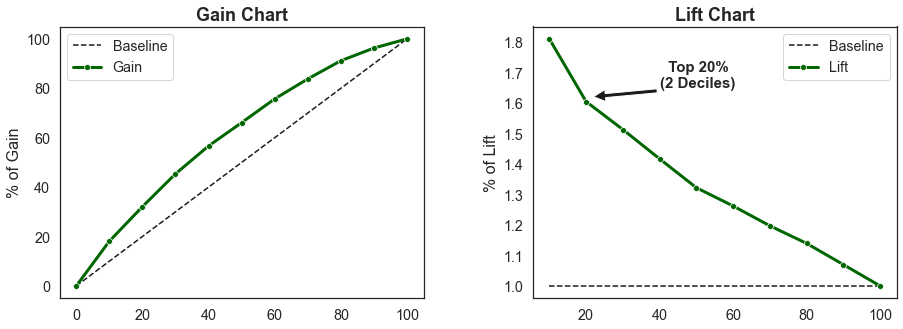

In [110]:
# Visualize the Gain and Lift Charts
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.subplots_adjust(wspace = 0.3)

# Gain Chart
g = sns.lineplot(x = list(range(0, 110, 10)), y = list(range(0, 110, 10)), ax = ax[0], ls = "--", color = "k",
                 label = "Baseline")
g = sns.lineplot(x = list(range(0, 110, 10)), y = df2["Gain"], ax = ax[0], lw = 3, label = "Gain",
                 color = "#006600", marker = "o")
ax[0].set_ylim(-5, 105)
ax[0].set_title("Gain Chart", weight = "bold", fontsize = 18)
ax[0].set_ylabel("% of Gain", size = 16)


# Lift Chart
g = sns.lineplot(x = list(range(10, 110, 10)), y = np.repeat(1, 10), ax = ax[1], ls = "--", color = "k",
                 label = "Baseline")
g = sns.lineplot(x = list(range(10, 110, 10)), y = df2["Lift"][1:], ax = ax[1], lw = 3, label = "Lift",
                 color = "#006600", marker = "o")
ax[1].set_title("Lift Chart", weight = "bold", fontsize = 18)
ax[1].set_ylabel("% of Lift", size = 16)

# Annotation
ax[1].annotate("  Top 20%\n(2 Deciles)", xy = (22, 1.62), xytext = (40, 1.65), fontsize = 15,
             weight = "bold", arrowprops = dict(fc = "k"));

In [111]:
## Workings for interpretation 1:
Cummulative_Churner = df2.iloc[2][2]   # Top 20% of cummulative churners
Total_Number = len(df1)                # Total number of customers

Actual_Churn_20 = round(Cummulative_Churner / Total_Number * 100, 2)


print(f"Cummulative Churner     : {Cummulative_Churner}")
print(f"Total number of customer: {Total_Number}\n")

print("Actual churn sorted by their churn probability = Cummulative_Churner / Total_Number * 100")
print(f"                                               = {Actual_Churn_20}")

Cummulative Churner     : 1530.0
Total number of customer: 16555

Actual churn sorted by their churn probability = Cummulative_Churner / Total_Number * 100
                                               = 9.24


In [112]:
## Workings for interpretation 2:
Monthly_Revenue = clean_df["MonthlyRevenue"].sum()  # Total Monthly revenue
Churn_Probability_20 = Actual_Churn_20 / 100        # Actual churn of 20% 
Lift = df2.iloc[2][5]                               # Top 20% of Lift

target_20 = round(Monthly_Revenue * Churn_Probability_20 * Lift, 2)

print(f"Monthly_Revenue       : {Monthly_Revenue}")
print(f"Churn Probability 20% : {Churn_Probability_20}")
print(f"Lift 20%              : {Lift}\n")


print(f"Total monthly revenue if we target the top 20% = Monthly Revenue * Churn_Probability_20 * Lift 20%")
print(f"                                               = {target_20}")

Monthly_Revenue       : 2900821.4
Churn Probability 20% : 0.0924
Lift 20%              : 1.6041098762843364

Total monthly revenue if we target the top 20% = Monthly Revenue * Churn_Probability_20 * Lift 20%
                                               = 429959.03


<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?

**Interpretation:**<br>
* <i>Note: The value will be changed when re-run the whole notebook</i>
1. The % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability is: **9.19%**
<br>
2. The total monthly revenue if we target the top 20% of the customers will be: **425,396.43**